In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv("D:\Mini_pro\crop Recommendation\Datasets\crop_yield.csv")

In [4]:
df.sample(5)

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
10896,Sugarcane,2008,Kharif,Uttar Pradesh,2084179.0,109047670,891.6,2.981210e+08,187576.11,47.592571
17942,Other Cereals,2011,Kharif,Jammu and Kashmir,390.0,199,887.6,6.533280e+04,128.70,0.536667
14467,Potato,2015,Kharif,Mizoram,6.0,6,2310.8,9.474600e+02,1.98,1.000000
3983,Potato,2013,Summer,Karnataka,582.0,8176,1235.6,8.409318e+04,157.14,14.034167
1180,Groundnut,2002,Kharif,West Bengal,1368.0,1317,1629.1,1.295086e+05,342.00,1.162500


In [5]:
df.isnull().sum()

Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64

In [6]:
df.shape

(19689, 10)

In [7]:
df.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19689.000000,1.968900e+04,1.968900e+04,19689.000000,1.968900e+04,1.968900e+04,19689.000000
mean,2009.127584,1.799266e+05,1.643594e+07,1437.755177,2.410331e+07,4.884835e+04,79.954009
std,6.498099,7.328287e+05,2.630568e+08,816.909589,9.494600e+07,2.132874e+05,878.306193
min,1997.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000
25%,2004.000000,1.390000e+03,1.393000e+03,940.700000,1.880146e+05,3.567000e+02,0.600000
50%,2010.000000,9.317000e+03,1.380400e+04,1247.600000,1.234957e+06,2.421900e+03,1.030000
75%,2015.000000,7.511200e+04,1.227180e+05,1643.700000,1.000385e+07,2.004170e+04,2.388889
max,2020.000000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,21105.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Crop_encoded']=le.fit_transform(df['Crop'])
df['State_encoded']=le.fit_transform(df['State'])
df['Season_encoded']=le.fit_transform(df['Season'])

C:\Users\megha\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [10]:
df.drop(['Crop','State','Season'],axis=1,inplace=True)

In [11]:
df.drop(['Crop_Year'],axis=1,inplace=True)

In [12]:
import seaborn as sns

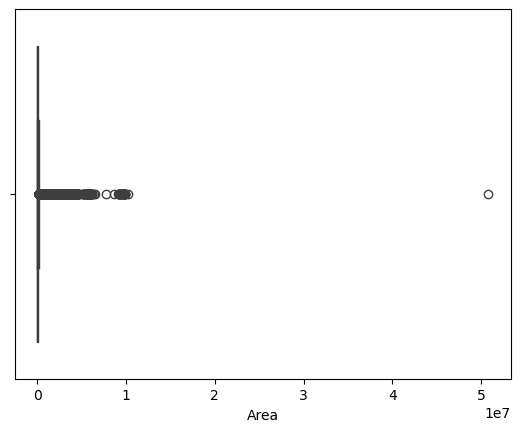

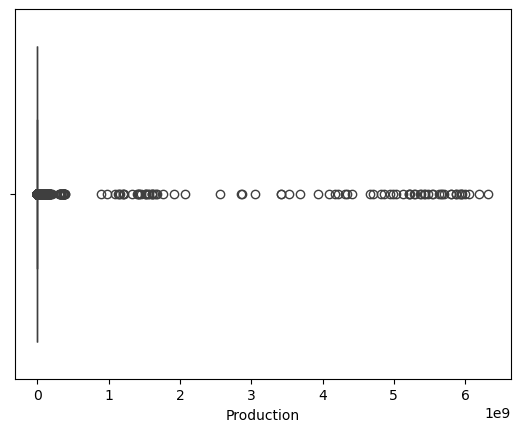

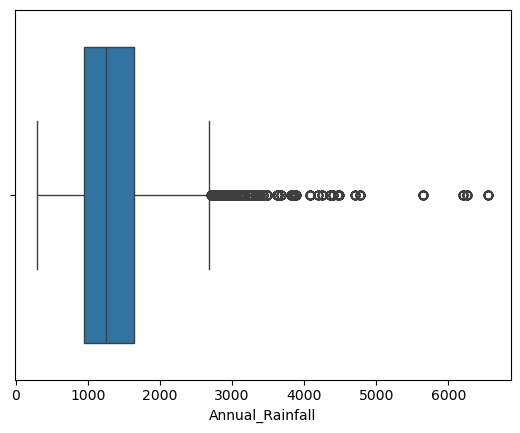

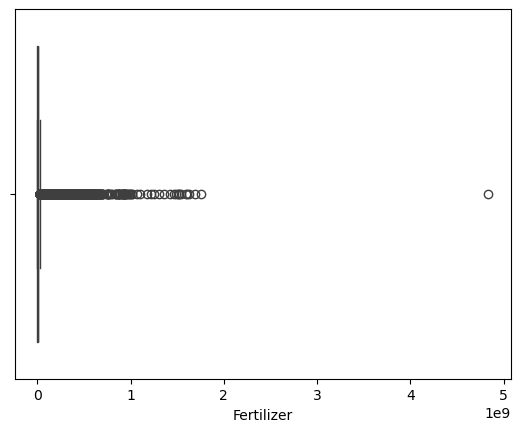

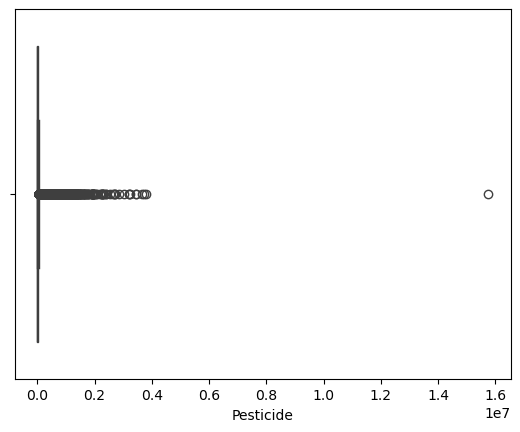

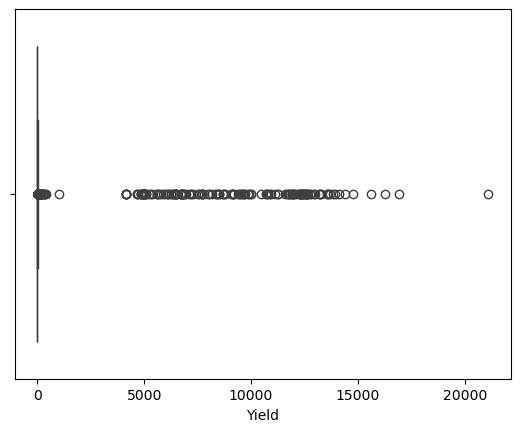

In [13]:
for i in df:
    if(i not in ['State_encoded','Crop_encoded','Season_encoded']):
        sns.boxplot(x=df[i])
    plt.show()

In [14]:
#Removing Outliers
for i in df.columns:
    q75,q25=np.percentile(df[i],[75,25])
    iqr=q75-q25
    min_val=q25-(iqr*1.5)
    max_val=q75+(iqr*1.5)
    
    df=df[(df[i]<max_val)]
    df=df[(df[i]>min_val)]

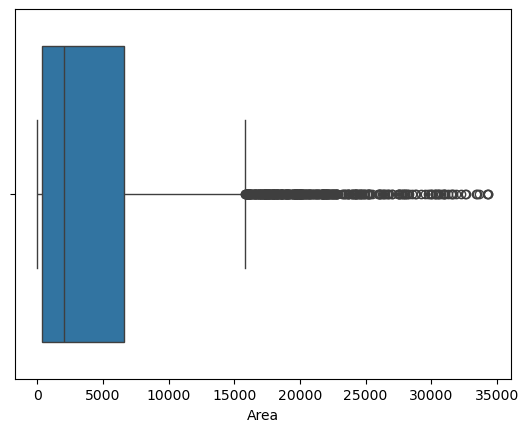

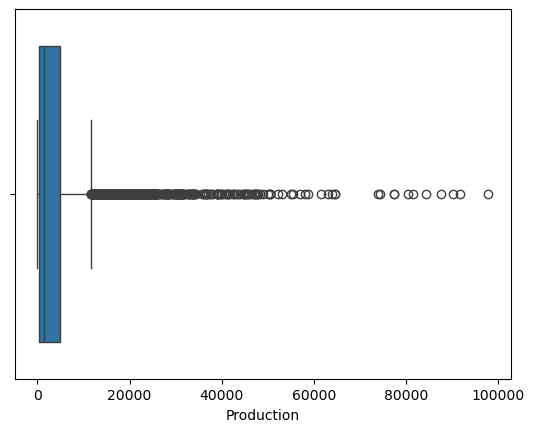

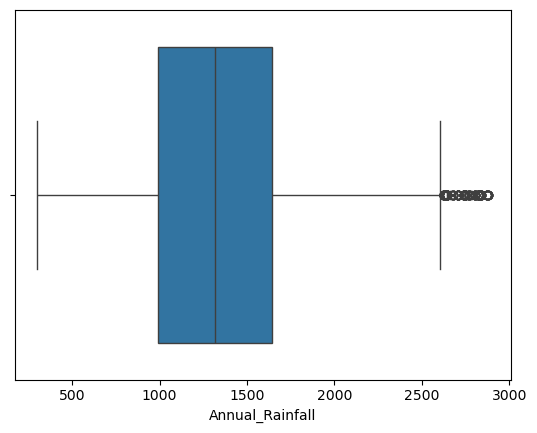

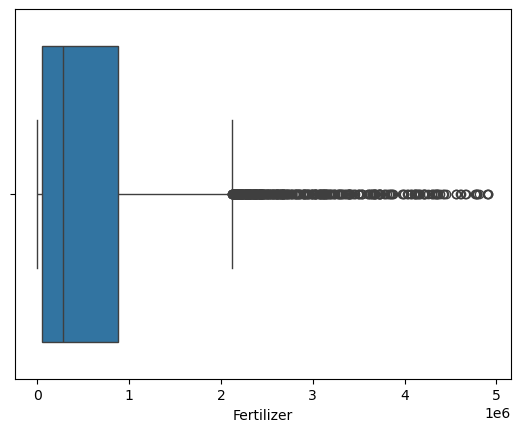

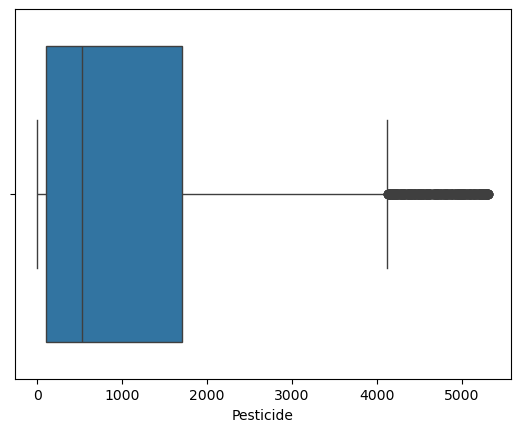

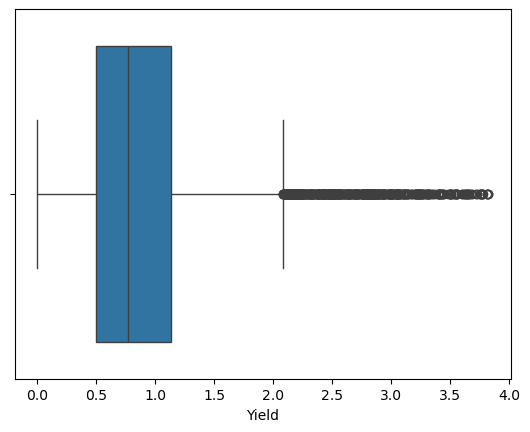

In [15]:
for i in df.columns:
    if(i not in ['State_encoded','Crop_encoded','Season_encoded']):
        sns.boxplot(x=df[i],data=df)
    plt.show()


<AxesSubplot:>

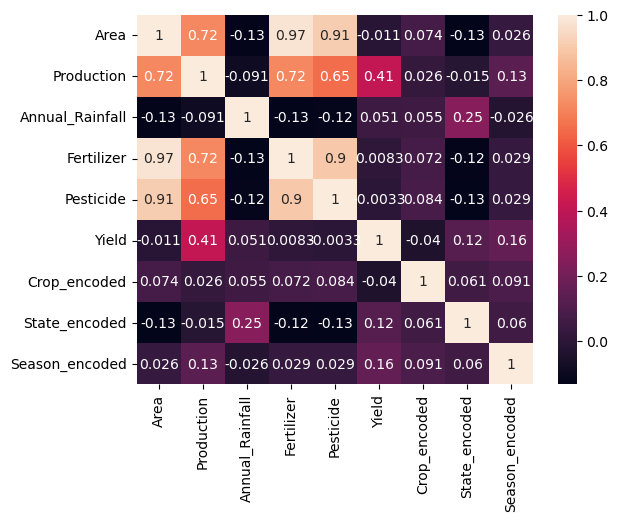

In [16]:
sns.heatmap(df.corr(),annot=True)

In [17]:
Y=df['Yield']
X=df.drop('Yield',axis=1)
print(X)
print(Y)
from sklearn.preprocessing import MinMaxScaler
min_max_scaler=MinMaxScaler()
X_scaled=pd.DataFrame(min_max_scaler.fit_transform(X))

          Area  Production  Annual_Rainfall  Fertilizer  Pesticide  \
1       6637.0        4685           2051.4   631643.29    2057.47   
2        796.0          22           2051.4    75755.32     246.76   
4       1739.0         794           2051.4   165500.63     539.09   
6       2979.0        1507           2051.4   283511.43     923.49   
8      10098.0        5158           2051.4   961026.66    3130.38   
...        ...         ...              ...         ...        ...   
19677  13720.0        3583           1635.9  2225384.00    4802.00   
19678   4571.0        2336           1635.9   741416.20    1599.85   
19680    147.0         268           1635.9    23843.40      51.45   
19684   4000.0        2000           1498.0   395200.00    1160.00   
19685   1000.0        3000           1498.0    98800.00     290.00   

       Crop_encoded  State_encoded  Season_encoded  
1                 1              2               1  
2                 8              2               1  


In [18]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
x_train,x_test,y_train,y_test=train_test_split(X_scaled,Y,test_size=0.2,random_state=50)
neural_regressor=tf.keras.models.Sequential()
neural_regressor.add(tf.keras.layers.Dense(units=30,activation='relu',))
neural_regressor.add(tf.keras.layers.Dense(units=15,activation='relu'))
neural_regressor.add(tf.keras.layers.Dense(units=7,activation='relu'))
neural_regressor.add(tf.keras.layers.Dense(units=1,activation='linear'))

neural_regressor.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss='mse',metrics=['mean_absolute_error'])
plot_data=neural_regressor.fit(x_train,y_train,epochs=5500,validation_data=(x_test,y_test),batch_size=32)

Epoch 1/5500
190/190 [==============================] - 3s 6ms/step - loss: 0.5933 - mean_absolute_error: 0.5500 - val_loss: 0.4203 - val_mean_absolute_error: 0.4733
Epoch 2/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.4033 - mean_absolute_error: 0.4658 - val_loss: 0.3660 - val_mean_absolute_error: 0.4282
Epoch 3/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.3391 - mean_absolute_error: 0.4208 - val_loss: 0.3012 - val_mean_absolute_error: 0.3978
Epoch 4/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.2884 - mean_absolute_error: 0.3797 - val_loss: 0.2623 - val_mean_absolute_error: 0.3620
Epoch 5/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.2653 - mean_absolute_error: 0.3584 - val_loss: 0.2514 - val_mean_absolute_error: 0.3397
Epoch 6/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.2549 - mean_absolute_error: 0.3485 - val_loss: 0.2408 - val_mean_absolute_error: 0.3304
Epoc

190/190 [==============================] - 1s 5ms/step - loss: 0.1232 - mean_absolute_error: 0.2107 - val_loss: 0.1125 - val_mean_absolute_error: 0.1967
Epoch 51/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.1240 - mean_absolute_error: 0.2137 - val_loss: 0.1136 - val_mean_absolute_error: 0.2042
Epoch 52/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.1214 - mean_absolute_error: 0.2095 - val_loss: 0.1129 - val_mean_absolute_error: 0.1960
Epoch 53/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.1239 - mean_absolute_error: 0.2142 - val_loss: 0.1209 - val_mean_absolute_error: 0.2009
Epoch 54/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.1198 - mean_absolute_error: 0.2053 - val_loss: 0.1113 - val_mean_absolute_error: 0.2005
Epoch 55/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.1199 - mean_absolute_error: 0.2084 - val_loss: 0.1130 - val_mean_absolute_error: 0.2020
Epoch 56/550

190/190 [==============================] - 1s 4ms/step - loss: 0.1005 - mean_absolute_error: 0.1889 - val_loss: 0.0840 - val_mean_absolute_error: 0.1690
Epoch 100/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0955 - mean_absolute_error: 0.1859 - val_loss: 0.0837 - val_mean_absolute_error: 0.1681
Epoch 101/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0911 - mean_absolute_error: 0.1800 - val_loss: 0.0886 - val_mean_absolute_error: 0.1822
Epoch 102/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0958 - mean_absolute_error: 0.1865 - val_loss: 0.1098 - val_mean_absolute_error: 0.2178
Epoch 103/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0976 - mean_absolute_error: 0.1872 - val_loss: 0.0847 - val_mean_absolute_error: 0.1734
Epoch 104/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0929 - mean_absolute_error: 0.1820 - val_loss: 0.0859 - val_mean_absolute_error: 0.1730
Epoch 1

Epoch 148/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0830 - mean_absolute_error: 0.1733 - val_loss: 0.0736 - val_mean_absolute_error: 0.1644
Epoch 149/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0821 - mean_absolute_error: 0.1697 - val_loss: 0.0842 - val_mean_absolute_error: 0.1706
Epoch 150/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0866 - mean_absolute_error: 0.1754 - val_loss: 0.1330 - val_mean_absolute_error: 0.2220
Epoch 151/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0851 - mean_absolute_error: 0.1734 - val_loss: 0.0711 - val_mean_absolute_error: 0.1513
Epoch 152/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0838 - mean_absolute_error: 0.1706 - val_loss: 0.0942 - val_mean_absolute_error: 0.1793
Epoch 153/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0827 - mean_absolute_error: 0.1697 - val_loss: 0.1045 - val_mean_absolute_error:

Epoch 197/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0801 - mean_absolute_error: 0.1685 - val_loss: 0.0922 - val_mean_absolute_error: 0.1820
Epoch 198/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0814 - mean_absolute_error: 0.1679 - val_loss: 0.0906 - val_mean_absolute_error: 0.1659
Epoch 199/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0832 - mean_absolute_error: 0.1717 - val_loss: 0.0688 - val_mean_absolute_error: 0.1588
Epoch 200/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0816 - mean_absolute_error: 0.1683 - val_loss: 0.0806 - val_mean_absolute_error: 0.1798
Epoch 201/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0739 - mean_absolute_error: 0.1594 - val_loss: 0.0681 - val_mean_absolute_error: 0.1528
Epoch 202/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0775 - mean_absolute_error: 0.1678 - val_loss: 0.0709 - val_mean_absolute_error:

Epoch 246/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0695 - mean_absolute_error: 0.1539 - val_loss: 0.0655 - val_mean_absolute_error: 0.1475
Epoch 247/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0789 - mean_absolute_error: 0.1654 - val_loss: 0.0634 - val_mean_absolute_error: 0.1496
Epoch 248/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0690 - mean_absolute_error: 0.1531 - val_loss: 0.0733 - val_mean_absolute_error: 0.1445
Epoch 249/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0759 - mean_absolute_error: 0.1621 - val_loss: 0.0614 - val_mean_absolute_error: 0.1416
Epoch 250/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0711 - mean_absolute_error: 0.1564 - val_loss: 0.0701 - val_mean_absolute_error: 0.1636
Epoch 251/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0779 - mean_absolute_error: 0.1659 - val_loss: 0.0687 - val_mean_absolute_error:

Epoch 295/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0657 - mean_absolute_error: 0.1510 - val_loss: 0.0709 - val_mean_absolute_error: 0.1416
Epoch 296/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0688 - mean_absolute_error: 0.1539 - val_loss: 0.0688 - val_mean_absolute_error: 0.1545
Epoch 297/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0734 - mean_absolute_error: 0.1602 - val_loss: 0.0627 - val_mean_absolute_error: 0.1429
Epoch 298/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0738 - mean_absolute_error: 0.1628 - val_loss: 0.0642 - val_mean_absolute_error: 0.1505
Epoch 299/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0655 - mean_absolute_error: 0.1513 - val_loss: 0.0619 - val_mean_absolute_error: 0.1430
Epoch 300/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0708 - mean_absolute_error: 0.1577 - val_loss: 0.0630 - val_mean_absolute_error:

Epoch 344/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0669 - mean_absolute_error: 0.1542 - val_loss: 0.0680 - val_mean_absolute_error: 0.1547
Epoch 345/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0696 - mean_absolute_error: 0.1573 - val_loss: 0.0676 - val_mean_absolute_error: 0.1420
Epoch 346/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0705 - mean_absolute_error: 0.1545 - val_loss: 0.0706 - val_mean_absolute_error: 0.1401
Epoch 347/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0647 - mean_absolute_error: 0.1476 - val_loss: 0.0598 - val_mean_absolute_error: 0.1392
Epoch 348/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0647 - mean_absolute_error: 0.1480 - val_loss: 0.0635 - val_mean_absolute_error: 0.1378
Epoch 349/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0672 - mean_absolute_error: 0.1522 - val_loss: 0.0607 - val_mean_absolute_error:

Epoch 393/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0649 - mean_absolute_error: 0.1475 - val_loss: 0.0666 - val_mean_absolute_error: 0.1427
Epoch 394/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0678 - mean_absolute_error: 0.1535 - val_loss: 0.0658 - val_mean_absolute_error: 0.1603
Epoch 395/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0710 - mean_absolute_error: 0.1578 - val_loss: 0.0587 - val_mean_absolute_error: 0.1406
Epoch 396/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0659 - mean_absolute_error: 0.1510 - val_loss: 0.0608 - val_mean_absolute_error: 0.1391
Epoch 397/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0681 - mean_absolute_error: 0.1520 - val_loss: 0.0646 - val_mean_absolute_error: 0.1403
Epoch 398/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0624 - mean_absolute_error: 0.1476 - val_loss: 0.0693 - val_mean_absolute_error:

Epoch 442/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0638 - mean_absolute_error: 0.1463 - val_loss: 0.0569 - val_mean_absolute_error: 0.1378
Epoch 443/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0614 - mean_absolute_error: 0.1464 - val_loss: 0.0609 - val_mean_absolute_error: 0.1374
Epoch 444/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0634 - mean_absolute_error: 0.1475 - val_loss: 0.0706 - val_mean_absolute_error: 0.1433
Epoch 445/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0611 - mean_absolute_error: 0.1450 - val_loss: 0.0569 - val_mean_absolute_error: 0.1369
Epoch 446/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0652 - mean_absolute_error: 0.1508 - val_loss: 0.0714 - val_mean_absolute_error: 0.1523
Epoch 447/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0595 - mean_absolute_error: 0.1427 - val_loss: 0.0639 - val_mean_absolute_error:

Epoch 491/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0613 - mean_absolute_error: 0.1459 - val_loss: 0.0558 - val_mean_absolute_error: 0.1332
Epoch 492/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0649 - mean_absolute_error: 0.1501 - val_loss: 0.0639 - val_mean_absolute_error: 0.1429
Epoch 493/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0636 - mean_absolute_error: 0.1477 - val_loss: 0.0618 - val_mean_absolute_error: 0.1457
Epoch 494/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0581 - mean_absolute_error: 0.1421 - val_loss: 0.0617 - val_mean_absolute_error: 0.1486
Epoch 495/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0633 - mean_absolute_error: 0.1481 - val_loss: 0.0726 - val_mean_absolute_error: 0.1574
Epoch 496/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0587 - mean_absolute_error: 0.1396 - val_loss: 0.0624 - val_mean_absolute_error:

Epoch 540/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0583 - mean_absolute_error: 0.1424 - val_loss: 0.0592 - val_mean_absolute_error: 0.1348
Epoch 541/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0621 - mean_absolute_error: 0.1488 - val_loss: 0.0561 - val_mean_absolute_error: 0.1322
Epoch 542/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0654 - mean_absolute_error: 0.1493 - val_loss: 0.0614 - val_mean_absolute_error: 0.1404
Epoch 543/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0566 - mean_absolute_error: 0.1377 - val_loss: 0.0691 - val_mean_absolute_error: 0.1401
Epoch 544/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0596 - mean_absolute_error: 0.1440 - val_loss: 0.0569 - val_mean_absolute_error: 0.1351
Epoch 545/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0585 - mean_absolute_error: 0.1405 - val_loss: 0.0590 - val_mean_absolute_error:

Epoch 589/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0554 - mean_absolute_error: 0.1371 - val_loss: 0.0545 - val_mean_absolute_error: 0.1310
Epoch 590/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0564 - mean_absolute_error: 0.1393 - val_loss: 0.0560 - val_mean_absolute_error: 0.1385
Epoch 591/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0601 - mean_absolute_error: 0.1430 - val_loss: 0.0600 - val_mean_absolute_error: 0.1355
Epoch 592/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0571 - mean_absolute_error: 0.1398 - val_loss: 0.0797 - val_mean_absolute_error: 0.1485
Epoch 593/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0569 - mean_absolute_error: 0.1396 - val_loss: 0.0592 - val_mean_absolute_error: 0.1396
Epoch 594/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0596 - mean_absolute_error: 0.1410 - val_loss: 0.0616 - val_mean_absolute_error:

Epoch 638/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0535 - mean_absolute_error: 0.1330 - val_loss: 0.0583 - val_mean_absolute_error: 0.1404
Epoch 639/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0578 - mean_absolute_error: 0.1393 - val_loss: 0.0612 - val_mean_absolute_error: 0.1387
Epoch 640/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0564 - mean_absolute_error: 0.1374 - val_loss: 0.0675 - val_mean_absolute_error: 0.1431
Epoch 641/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0589 - mean_absolute_error: 0.1396 - val_loss: 0.0671 - val_mean_absolute_error: 0.1386
Epoch 642/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0643 - mean_absolute_error: 0.1500 - val_loss: 0.0553 - val_mean_absolute_error: 0.1338
Epoch 643/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0574 - mean_absolute_error: 0.1401 - val_loss: 0.0628 - val_mean_absolute_error:

Epoch 687/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0542 - mean_absolute_error: 0.1345 - val_loss: 0.0666 - val_mean_absolute_error: 0.1445
Epoch 688/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0594 - mean_absolute_error: 0.1426 - val_loss: 0.0757 - val_mean_absolute_error: 0.1511
Epoch 689/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0579 - mean_absolute_error: 0.1382 - val_loss: 0.0548 - val_mean_absolute_error: 0.1351
Epoch 690/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0543 - mean_absolute_error: 0.1330 - val_loss: 0.0532 - val_mean_absolute_error: 0.1315
Epoch 691/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0555 - mean_absolute_error: 0.1363 - val_loss: 0.0638 - val_mean_absolute_error: 0.1373
Epoch 692/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0579 - mean_absolute_error: 0.1388 - val_loss: 0.0565 - val_mean_absolute_error:

Epoch 736/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0536 - mean_absolute_error: 0.1346 - val_loss: 0.0569 - val_mean_absolute_error: 0.1347
Epoch 737/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0545 - mean_absolute_error: 0.1369 - val_loss: 0.0751 - val_mean_absolute_error: 0.1457
Epoch 738/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0532 - mean_absolute_error: 0.1351 - val_loss: 0.0532 - val_mean_absolute_error: 0.1313
Epoch 739/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0588 - mean_absolute_error: 0.1418 - val_loss: 0.0713 - val_mean_absolute_error: 0.1485
Epoch 740/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0552 - mean_absolute_error: 0.1368 - val_loss: 0.0545 - val_mean_absolute_error: 0.1330
Epoch 741/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0551 - mean_absolute_error: 0.1365 - val_loss: 0.0623 - val_mean_absolute_error:

Epoch 785/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0544 - mean_absolute_error: 0.1342 - val_loss: 0.0553 - val_mean_absolute_error: 0.1284
Epoch 786/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0551 - mean_absolute_error: 0.1356 - val_loss: 0.0683 - val_mean_absolute_error: 0.1641
Epoch 787/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0543 - mean_absolute_error: 0.1386 - val_loss: 0.0593 - val_mean_absolute_error: 0.1319
Epoch 788/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0534 - mean_absolute_error: 0.1346 - val_loss: 0.0566 - val_mean_absolute_error: 0.1342
Epoch 789/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0549 - mean_absolute_error: 0.1369 - val_loss: 0.0546 - val_mean_absolute_error: 0.1343
Epoch 790/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0511 - mean_absolute_error: 0.1310 - val_loss: 0.0547 - val_mean_absolute_error:

Epoch 834/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0537 - mean_absolute_error: 0.1362 - val_loss: 0.0803 - val_mean_absolute_error: 0.1634
Epoch 835/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0567 - mean_absolute_error: 0.1394 - val_loss: 0.0554 - val_mean_absolute_error: 0.1308
Epoch 836/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0588 - mean_absolute_error: 0.1392 - val_loss: 0.0622 - val_mean_absolute_error: 0.1627
Epoch 837/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0548 - mean_absolute_error: 0.1362 - val_loss: 0.0607 - val_mean_absolute_error: 0.1411
Epoch 838/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0555 - mean_absolute_error: 0.1385 - val_loss: 0.0576 - val_mean_absolute_error: 0.1361
Epoch 839/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0553 - mean_absolute_error: 0.1391 - val_loss: 0.0590 - val_mean_absolute_error:

Epoch 883/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0517 - mean_absolute_error: 0.1325 - val_loss: 0.0544 - val_mean_absolute_error: 0.1309
Epoch 884/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0487 - mean_absolute_error: 0.1281 - val_loss: 0.0657 - val_mean_absolute_error: 0.1480
Epoch 885/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0540 - mean_absolute_error: 0.1356 - val_loss: 0.0579 - val_mean_absolute_error: 0.1321
Epoch 886/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0519 - mean_absolute_error: 0.1320 - val_loss: 0.0517 - val_mean_absolute_error: 0.1316
Epoch 887/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0526 - mean_absolute_error: 0.1329 - val_loss: 0.0585 - val_mean_absolute_error: 0.1437
Epoch 888/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0500 - mean_absolute_error: 0.1311 - val_loss: 0.0578 - val_mean_absolute_error:

Epoch 932/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0536 - mean_absolute_error: 0.1359 - val_loss: 0.0813 - val_mean_absolute_error: 0.1861
Epoch 933/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0595 - mean_absolute_error: 0.1411 - val_loss: 0.0730 - val_mean_absolute_error: 0.1499
Epoch 934/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0523 - mean_absolute_error: 0.1350 - val_loss: 0.0731 - val_mean_absolute_error: 0.1600
Epoch 935/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0492 - mean_absolute_error: 0.1320 - val_loss: 0.0557 - val_mean_absolute_error: 0.1401
Epoch 936/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0497 - mean_absolute_error: 0.1307 - val_loss: 0.0600 - val_mean_absolute_error: 0.1421
Epoch 937/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0475 - mean_absolute_error: 0.1269 - val_loss: 0.0574 - val_mean_absolute_error:

Epoch 981/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0493 - mean_absolute_error: 0.1301 - val_loss: 0.0526 - val_mean_absolute_error: 0.1311
Epoch 982/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0561 - mean_absolute_error: 0.1386 - val_loss: 0.0697 - val_mean_absolute_error: 0.1458
Epoch 983/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0523 - mean_absolute_error: 0.1329 - val_loss: 0.0613 - val_mean_absolute_error: 0.1620
Epoch 984/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0481 - mean_absolute_error: 0.1289 - val_loss: 0.0592 - val_mean_absolute_error: 0.1429
Epoch 985/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0493 - mean_absolute_error: 0.1285 - val_loss: 0.0518 - val_mean_absolute_error: 0.1290
Epoch 986/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0487 - mean_absolute_error: 0.1284 - val_loss: 0.0516 - val_mean_absolute_error:

190/190 [==============================] - 1s 5ms/step - loss: 0.0486 - mean_absolute_error: 0.1296 - val_loss: 0.0612 - val_mean_absolute_error: 0.1411
Epoch 1030/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0523 - mean_absolute_error: 0.1335 - val_loss: 0.0537 - val_mean_absolute_error: 0.1328
Epoch 1031/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0506 - mean_absolute_error: 0.1315 - val_loss: 0.0562 - val_mean_absolute_error: 0.1424
Epoch 1032/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0535 - mean_absolute_error: 0.1361 - val_loss: 0.0559 - val_mean_absolute_error: 0.1437
Epoch 1033/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0481 - mean_absolute_error: 0.1306 - val_loss: 0.0534 - val_mean_absolute_error: 0.1393
Epoch 1034/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0508 - mean_absolute_error: 0.1320 - val_loss: 0.0715 - val_mean_absolute_error: 0.1578
Ep

190/190 [==============================] - 1s 5ms/step - loss: 0.0488 - mean_absolute_error: 0.1298 - val_loss: 0.0652 - val_mean_absolute_error: 0.1463
Epoch 1078/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0479 - mean_absolute_error: 0.1280 - val_loss: 0.0609 - val_mean_absolute_error: 0.1380
Epoch 1079/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0467 - mean_absolute_error: 0.1281 - val_loss: 0.0548 - val_mean_absolute_error: 0.1282
Epoch 1080/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0534 - mean_absolute_error: 0.1359 - val_loss: 0.0540 - val_mean_absolute_error: 0.1365
Epoch 1081/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0503 - mean_absolute_error: 0.1308 - val_loss: 0.0523 - val_mean_absolute_error: 0.1292
Epoch 1082/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0465 - mean_absolute_error: 0.1255 - val_loss: 0.0506 - val_mean_absolute_error: 0.1297
Ep

190/190 [==============================] - 1s 5ms/step - loss: 0.0466 - mean_absolute_error: 0.1251 - val_loss: 0.0542 - val_mean_absolute_error: 0.1317
Epoch 1126/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0492 - mean_absolute_error: 0.1308 - val_loss: 0.0692 - val_mean_absolute_error: 0.1662
Epoch 1127/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0504 - mean_absolute_error: 0.1314 - val_loss: 0.0585 - val_mean_absolute_error: 0.1340
Epoch 1128/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0479 - mean_absolute_error: 0.1290 - val_loss: 0.0539 - val_mean_absolute_error: 0.1362
Epoch 1129/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0465 - mean_absolute_error: 0.1262 - val_loss: 0.0697 - val_mean_absolute_error: 0.1456
Epoch 1130/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0497 - mean_absolute_error: 0.1281 - val_loss: 0.0548 - val_mean_absolute_error: 0.1272
Ep

190/190 [==============================] - 1s 4ms/step - loss: 0.0485 - mean_absolute_error: 0.1285 - val_loss: 0.0612 - val_mean_absolute_error: 0.1340
Epoch 1174/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0479 - mean_absolute_error: 0.1271 - val_loss: 0.0565 - val_mean_absolute_error: 0.1338
Epoch 1175/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0525 - mean_absolute_error: 0.1321 - val_loss: 0.0533 - val_mean_absolute_error: 0.1284
Epoch 1176/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0476 - mean_absolute_error: 0.1270 - val_loss: 0.0544 - val_mean_absolute_error: 0.1315
Epoch 1177/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0486 - mean_absolute_error: 0.1281 - val_loss: 0.0536 - val_mean_absolute_error: 0.1401
Epoch 1178/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0471 - mean_absolute_error: 0.1267 - val_loss: 0.0568 - val_mean_absolute_error: 0.1319
Ep

190/190 [==============================] - 1s 4ms/step - loss: 0.0478 - mean_absolute_error: 0.1277 - val_loss: 0.0493 - val_mean_absolute_error: 0.1237
Epoch 1222/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0451 - mean_absolute_error: 0.1253 - val_loss: 0.0523 - val_mean_absolute_error: 0.1364
Epoch 1223/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0468 - mean_absolute_error: 0.1273 - val_loss: 0.0570 - val_mean_absolute_error: 0.1500
Epoch 1224/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0477 - mean_absolute_error: 0.1264 - val_loss: 0.0537 - val_mean_absolute_error: 0.1314
Epoch 1225/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0477 - mean_absolute_error: 0.1276 - val_loss: 0.0522 - val_mean_absolute_error: 0.1277
Epoch 1226/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0476 - mean_absolute_error: 0.1285 - val_loss: 0.0604 - val_mean_absolute_error: 0.1550
Ep

190/190 [==============================] - 1s 4ms/step - loss: 0.0471 - mean_absolute_error: 0.1292 - val_loss: 0.0573 - val_mean_absolute_error: 0.1398
Epoch 1270/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0470 - mean_absolute_error: 0.1270 - val_loss: 0.0510 - val_mean_absolute_error: 0.1271
Epoch 1271/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0468 - mean_absolute_error: 0.1278 - val_loss: 0.0549 - val_mean_absolute_error: 0.1375
Epoch 1272/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0479 - mean_absolute_error: 0.1277 - val_loss: 0.0525 - val_mean_absolute_error: 0.1308
Epoch 1273/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0477 - mean_absolute_error: 0.1299 - val_loss: 0.0591 - val_mean_absolute_error: 0.1551
Epoch 1274/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0479 - mean_absolute_error: 0.1281 - val_loss: 0.0588 - val_mean_absolute_error: 0.1476
Ep

190/190 [==============================] - 1s 5ms/step - loss: 0.0478 - mean_absolute_error: 0.1285 - val_loss: 0.0516 - val_mean_absolute_error: 0.1283
Epoch 1318/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0444 - mean_absolute_error: 0.1238 - val_loss: 0.0671 - val_mean_absolute_error: 0.1501
Epoch 1319/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0464 - mean_absolute_error: 0.1275 - val_loss: 0.0524 - val_mean_absolute_error: 0.1318
Epoch 1320/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0463 - mean_absolute_error: 0.1271 - val_loss: 0.0496 - val_mean_absolute_error: 0.1261
Epoch 1321/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0477 - mean_absolute_error: 0.1291 - val_loss: 0.0738 - val_mean_absolute_error: 0.1507
Epoch 1322/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0544 - mean_absolute_error: 0.1367 - val_loss: 0.0563 - val_mean_absolute_error: 0.1408
Ep

190/190 [==============================] - 1s 4ms/step - loss: 0.0440 - mean_absolute_error: 0.1238 - val_loss: 0.0566 - val_mean_absolute_error: 0.1321
Epoch 1366/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0515 - mean_absolute_error: 0.1324 - val_loss: 0.0497 - val_mean_absolute_error: 0.1297
Epoch 1367/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0468 - mean_absolute_error: 0.1263 - val_loss: 0.0632 - val_mean_absolute_error: 0.1416
Epoch 1368/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0477 - mean_absolute_error: 0.1309 - val_loss: 0.0500 - val_mean_absolute_error: 0.1281
Epoch 1369/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0436 - mean_absolute_error: 0.1242 - val_loss: 0.0735 - val_mean_absolute_error: 0.1413
Epoch 1370/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0462 - mean_absolute_error: 0.1273 - val_loss: 0.0650 - val_mean_absolute_error: 0.1455
Ep

190/190 [==============================] - 1s 5ms/step - loss: 0.0466 - mean_absolute_error: 0.1265 - val_loss: 0.0561 - val_mean_absolute_error: 0.1395
Epoch 1414/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0486 - mean_absolute_error: 0.1325 - val_loss: 0.0518 - val_mean_absolute_error: 0.1269
Epoch 1415/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0481 - mean_absolute_error: 0.1301 - val_loss: 0.0540 - val_mean_absolute_error: 0.1263
Epoch 1416/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0445 - mean_absolute_error: 0.1237 - val_loss: 0.0511 - val_mean_absolute_error: 0.1259
Epoch 1417/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0461 - mean_absolute_error: 0.1261 - val_loss: 0.0525 - val_mean_absolute_error: 0.1271
Epoch 1418/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0435 - mean_absolute_error: 0.1215 - val_loss: 0.0502 - val_mean_absolute_error: 0.1259
Ep

190/190 [==============================] - 1s 4ms/step - loss: 0.0448 - mean_absolute_error: 0.1248 - val_loss: 0.0500 - val_mean_absolute_error: 0.1309
Epoch 1462/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0451 - mean_absolute_error: 0.1251 - val_loss: 0.0683 - val_mean_absolute_error: 0.1511
Epoch 1463/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0432 - mean_absolute_error: 0.1244 - val_loss: 0.0574 - val_mean_absolute_error: 0.1314
Epoch 1464/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0463 - mean_absolute_error: 0.1246 - val_loss: 0.0706 - val_mean_absolute_error: 0.1486
Epoch 1465/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0441 - mean_absolute_error: 0.1250 - val_loss: 0.0566 - val_mean_absolute_error: 0.1342
Epoch 1466/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0523 - mean_absolute_error: 0.1322 - val_loss: 0.0572 - val_mean_absolute_error: 0.1380
Ep

190/190 [==============================] - 1s 4ms/step - loss: 0.0424 - mean_absolute_error: 0.1218 - val_loss: 0.0491 - val_mean_absolute_error: 0.1247
Epoch 1510/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0499 - mean_absolute_error: 0.1294 - val_loss: 0.0474 - val_mean_absolute_error: 0.1245
Epoch 1511/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0467 - mean_absolute_error: 0.1261 - val_loss: 0.0510 - val_mean_absolute_error: 0.1307
Epoch 1512/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0449 - mean_absolute_error: 0.1240 - val_loss: 0.0486 - val_mean_absolute_error: 0.1297
Epoch 1513/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0481 - mean_absolute_error: 0.1287 - val_loss: 0.0563 - val_mean_absolute_error: 0.1289
Epoch 1514/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0447 - mean_absolute_error: 0.1235 - val_loss: 0.0503 - val_mean_absolute_error: 0.1259
Ep

190/190 [==============================] - 1s 5ms/step - loss: 0.0440 - mean_absolute_error: 0.1245 - val_loss: 0.0541 - val_mean_absolute_error: 0.1279
Epoch 1558/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0473 - mean_absolute_error: 0.1277 - val_loss: 0.0503 - val_mean_absolute_error: 0.1245
Epoch 1559/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0435 - mean_absolute_error: 0.1227 - val_loss: 0.0597 - val_mean_absolute_error: 0.1436
Epoch 1560/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0431 - mean_absolute_error: 0.1228 - val_loss: 0.0494 - val_mean_absolute_error: 0.1250
Epoch 1561/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0433 - mean_absolute_error: 0.1221 - val_loss: 0.0538 - val_mean_absolute_error: 0.1406
Epoch 1562/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0449 - mean_absolute_error: 0.1262 - val_loss: 0.0549 - val_mean_absolute_error: 0.1340
Ep

190/190 [==============================] - 1s 4ms/step - loss: 0.0437 - mean_absolute_error: 0.1235 - val_loss: 0.0474 - val_mean_absolute_error: 0.1270
Epoch 1606/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0434 - mean_absolute_error: 0.1225 - val_loss: 0.0601 - val_mean_absolute_error: 0.1342
Epoch 1607/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0431 - mean_absolute_error: 0.1227 - val_loss: 0.0474 - val_mean_absolute_error: 0.1252
Epoch 1608/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0444 - mean_absolute_error: 0.1225 - val_loss: 0.0495 - val_mean_absolute_error: 0.1259
Epoch 1609/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0437 - mean_absolute_error: 0.1228 - val_loss: 0.0540 - val_mean_absolute_error: 0.1274
Epoch 1610/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0454 - mean_absolute_error: 0.1248 - val_loss: 0.0509 - val_mean_absolute_error: 0.1275
Ep

190/190 [==============================] - 1s 5ms/step - loss: 0.0451 - mean_absolute_error: 0.1266 - val_loss: 0.0470 - val_mean_absolute_error: 0.1240
Epoch 1654/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0443 - mean_absolute_error: 0.1229 - val_loss: 0.0467 - val_mean_absolute_error: 0.1223
Epoch 1655/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0425 - mean_absolute_error: 0.1227 - val_loss: 0.0510 - val_mean_absolute_error: 0.1275
Epoch 1656/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0442 - mean_absolute_error: 0.1251 - val_loss: 0.0496 - val_mean_absolute_error: 0.1273
Epoch 1657/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0474 - mean_absolute_error: 0.1317 - val_loss: 0.0590 - val_mean_absolute_error: 0.1623
Epoch 1658/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0439 - mean_absolute_error: 0.1251 - val_loss: 0.0519 - val_mean_absolute_error: 0.1359
Ep

190/190 [==============================] - 1s 5ms/step - loss: 0.0407 - mean_absolute_error: 0.1201 - val_loss: 0.0474 - val_mean_absolute_error: 0.1236
Epoch 1702/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0460 - mean_absolute_error: 0.1252 - val_loss: 0.0497 - val_mean_absolute_error: 0.1279
Epoch 1703/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0432 - mean_absolute_error: 0.1238 - val_loss: 0.0529 - val_mean_absolute_error: 0.1375
Epoch 1704/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0433 - mean_absolute_error: 0.1236 - val_loss: 0.0502 - val_mean_absolute_error: 0.1269
Epoch 1705/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0410 - mean_absolute_error: 0.1203 - val_loss: 0.0493 - val_mean_absolute_error: 0.1259
Epoch 1706/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0417 - mean_absolute_error: 0.1213 - val_loss: 0.0499 - val_mean_absolute_error: 0.1236
Ep

190/190 [==============================] - 1s 4ms/step - loss: 0.0446 - mean_absolute_error: 0.1255 - val_loss: 0.0505 - val_mean_absolute_error: 0.1248
Epoch 1750/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0436 - mean_absolute_error: 0.1237 - val_loss: 0.0520 - val_mean_absolute_error: 0.1345
Epoch 1751/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0417 - mean_absolute_error: 0.1224 - val_loss: 0.0637 - val_mean_absolute_error: 0.1359
Epoch 1752/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0437 - mean_absolute_error: 0.1235 - val_loss: 0.0550 - val_mean_absolute_error: 0.1281
Epoch 1753/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0427 - mean_absolute_error: 0.1237 - val_loss: 0.0529 - val_mean_absolute_error: 0.1369
Epoch 1754/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0424 - mean_absolute_error: 0.1215 - val_loss: 0.0491 - val_mean_absolute_error: 0.1305
Ep

190/190 [==============================] - 1s 5ms/step - loss: 0.0431 - mean_absolute_error: 0.1240 - val_loss: 0.0495 - val_mean_absolute_error: 0.1259
Epoch 1798/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0482 - mean_absolute_error: 0.1301 - val_loss: 0.0508 - val_mean_absolute_error: 0.1259
Epoch 1799/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0419 - mean_absolute_error: 0.1215 - val_loss: 0.0511 - val_mean_absolute_error: 0.1292
Epoch 1800/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0433 - mean_absolute_error: 0.1235 - val_loss: 0.0678 - val_mean_absolute_error: 0.1397
Epoch 1801/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0469 - mean_absolute_error: 0.1272 - val_loss: 0.0654 - val_mean_absolute_error: 0.1533
Epoch 1802/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0436 - mean_absolute_error: 0.1222 - val_loss: 0.0466 - val_mean_absolute_error: 0.1226
Ep

190/190 [==============================] - 1s 4ms/step - loss: 0.0446 - mean_absolute_error: 0.1253 - val_loss: 0.0497 - val_mean_absolute_error: 0.1266
Epoch 1846/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0416 - mean_absolute_error: 0.1205 - val_loss: 0.0520 - val_mean_absolute_error: 0.1235
Epoch 1847/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0420 - mean_absolute_error: 0.1218 - val_loss: 0.0467 - val_mean_absolute_error: 0.1232
Epoch 1848/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0427 - mean_absolute_error: 0.1233 - val_loss: 0.0615 - val_mean_absolute_error: 0.1356
Epoch 1849/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0441 - mean_absolute_error: 0.1256 - val_loss: 0.0469 - val_mean_absolute_error: 0.1205
Epoch 1850/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0401 - mean_absolute_error: 0.1204 - val_loss: 0.0512 - val_mean_absolute_error: 0.1255
Ep

190/190 [==============================] - 1s 4ms/step - loss: 0.0451 - mean_absolute_error: 0.1241 - val_loss: 0.0485 - val_mean_absolute_error: 0.1286
Epoch 1894/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0422 - mean_absolute_error: 0.1231 - val_loss: 0.0487 - val_mean_absolute_error: 0.1260
Epoch 1895/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0408 - mean_absolute_error: 0.1202 - val_loss: 0.0554 - val_mean_absolute_error: 0.1298
Epoch 1896/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0464 - mean_absolute_error: 0.1263 - val_loss: 0.0468 - val_mean_absolute_error: 0.1244
Epoch 1897/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0412 - mean_absolute_error: 0.1203 - val_loss: 0.0452 - val_mean_absolute_error: 0.1214
Epoch 1898/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0421 - mean_absolute_error: 0.1240 - val_loss: 0.0478 - val_mean_absolute_error: 0.1249
Ep

190/190 [==============================] - 1s 4ms/step - loss: 0.0379 - mean_absolute_error: 0.1170 - val_loss: 0.1135 - val_mean_absolute_error: 0.1832
Epoch 1942/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0438 - mean_absolute_error: 0.1263 - val_loss: 0.0479 - val_mean_absolute_error: 0.1308
Epoch 1943/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0526 - mean_absolute_error: 0.1357 - val_loss: 0.0599 - val_mean_absolute_error: 0.1314
Epoch 1944/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0393 - mean_absolute_error: 0.1187 - val_loss: 0.0555 - val_mean_absolute_error: 0.1281
Epoch 1945/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0439 - mean_absolute_error: 0.1234 - val_loss: 0.0485 - val_mean_absolute_error: 0.1224
Epoch 1946/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0420 - mean_absolute_error: 0.1217 - val_loss: 0.0535 - val_mean_absolute_error: 0.1315
Ep

190/190 [==============================] - 1s 4ms/step - loss: 0.0391 - mean_absolute_error: 0.1188 - val_loss: 0.0470 - val_mean_absolute_error: 0.1310
Epoch 1990/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0398 - mean_absolute_error: 0.1199 - val_loss: 0.0453 - val_mean_absolute_error: 0.1229
Epoch 1991/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0438 - mean_absolute_error: 0.1222 - val_loss: 0.0501 - val_mean_absolute_error: 0.1278
Epoch 1992/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0398 - mean_absolute_error: 0.1202 - val_loss: 0.0481 - val_mean_absolute_error: 0.1246
Epoch 1993/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0409 - mean_absolute_error: 0.1204 - val_loss: 0.0560 - val_mean_absolute_error: 0.1268
Epoch 1994/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0386 - mean_absolute_error: 0.1174 - val_loss: 0.0613 - val_mean_absolute_error: 0.1399
Ep

190/190 [==============================] - 1s 4ms/step - loss: 0.0412 - mean_absolute_error: 0.1199 - val_loss: 0.0494 - val_mean_absolute_error: 0.1283
Epoch 2038/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0411 - mean_absolute_error: 0.1221 - val_loss: 0.0490 - val_mean_absolute_error: 0.1280
Epoch 2039/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0420 - mean_absolute_error: 0.1218 - val_loss: 0.0473 - val_mean_absolute_error: 0.1239
Epoch 2040/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0382 - mean_absolute_error: 0.1169 - val_loss: 0.0477 - val_mean_absolute_error: 0.1259
Epoch 2041/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0402 - mean_absolute_error: 0.1201 - val_loss: 0.0502 - val_mean_absolute_error: 0.1264
Epoch 2042/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0382 - mean_absolute_error: 0.1166 - val_loss: 0.0441 - val_mean_absolute_error: 0.1201
Ep

190/190 [==============================] - 1s 4ms/step - loss: 0.0368 - mean_absolute_error: 0.1157 - val_loss: 0.0460 - val_mean_absolute_error: 0.1242
Epoch 2086/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0406 - mean_absolute_error: 0.1200 - val_loss: 0.0453 - val_mean_absolute_error: 0.1218
Epoch 2087/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0414 - mean_absolute_error: 0.1198 - val_loss: 0.0476 - val_mean_absolute_error: 0.1219
Epoch 2088/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0419 - mean_absolute_error: 0.1211 - val_loss: 0.0458 - val_mean_absolute_error: 0.1217
Epoch 2089/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0462 - mean_absolute_error: 0.1284 - val_loss: 0.0488 - val_mean_absolute_error: 0.1307
Epoch 2090/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0389 - mean_absolute_error: 0.1180 - val_loss: 0.0433 - val_mean_absolute_error: 0.1175
Ep

190/190 [==============================] - 1s 4ms/step - loss: 0.0421 - mean_absolute_error: 0.1227 - val_loss: 0.0598 - val_mean_absolute_error: 0.1347
Epoch 2134/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0406 - mean_absolute_error: 0.1176 - val_loss: 0.0473 - val_mean_absolute_error: 0.1255
Epoch 2135/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0387 - mean_absolute_error: 0.1181 - val_loss: 0.0465 - val_mean_absolute_error: 0.1226
Epoch 2136/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0369 - mean_absolute_error: 0.1153 - val_loss: 0.0438 - val_mean_absolute_error: 0.1187
Epoch 2137/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0422 - mean_absolute_error: 0.1223 - val_loss: 0.0518 - val_mean_absolute_error: 0.1279
Epoch 2138/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0384 - mean_absolute_error: 0.1169 - val_loss: 0.0466 - val_mean_absolute_error: 0.1232
Ep

190/190 [==============================] - 1s 5ms/step - loss: 0.0402 - mean_absolute_error: 0.1201 - val_loss: 0.0582 - val_mean_absolute_error: 0.1344
Epoch 2182/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0396 - mean_absolute_error: 0.1198 - val_loss: 0.0500 - val_mean_absolute_error: 0.1249
Epoch 2183/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0407 - mean_absolute_error: 0.1182 - val_loss: 0.0605 - val_mean_absolute_error: 0.1318
Epoch 2184/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0394 - mean_absolute_error: 0.1197 - val_loss: 0.0606 - val_mean_absolute_error: 0.1432
Epoch 2185/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0441 - mean_absolute_error: 0.1237 - val_loss: 0.0533 - val_mean_absolute_error: 0.1274
Epoch 2186/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0395 - mean_absolute_error: 0.1189 - val_loss: 0.0473 - val_mean_absolute_error: 0.1228
Ep

190/190 [==============================] - 1s 4ms/step - loss: 0.0399 - mean_absolute_error: 0.1188 - val_loss: 0.0514 - val_mean_absolute_error: 0.1268
Epoch 2230/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0387 - mean_absolute_error: 0.1185 - val_loss: 0.0515 - val_mean_absolute_error: 0.1296
Epoch 2231/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0383 - mean_absolute_error: 0.1188 - val_loss: 0.0505 - val_mean_absolute_error: 0.1272
Epoch 2232/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0457 - mean_absolute_error: 0.1259 - val_loss: 0.0461 - val_mean_absolute_error: 0.1270
Epoch 2233/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0417 - mean_absolute_error: 0.1210 - val_loss: 0.0518 - val_mean_absolute_error: 0.1245
Epoch 2234/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0390 - mean_absolute_error: 0.1191 - val_loss: 0.0491 - val_mean_absolute_error: 0.1262
Ep

190/190 [==============================] - 1s 5ms/step - loss: 0.0413 - mean_absolute_error: 0.1197 - val_loss: 0.0471 - val_mean_absolute_error: 0.1230
Epoch 2278/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0375 - mean_absolute_error: 0.1162 - val_loss: 0.0505 - val_mean_absolute_error: 0.1260
Epoch 2279/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0376 - mean_absolute_error: 0.1167 - val_loss: 0.0501 - val_mean_absolute_error: 0.1282
Epoch 2280/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0392 - mean_absolute_error: 0.1170 - val_loss: 0.0472 - val_mean_absolute_error: 0.1208
Epoch 2281/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0436 - mean_absolute_error: 0.1240 - val_loss: 0.0474 - val_mean_absolute_error: 0.1242
Epoch 2282/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0395 - mean_absolute_error: 0.1192 - val_loss: 0.0606 - val_mean_absolute_error: 0.1304
Ep

190/190 [==============================] - 1s 5ms/step - loss: 0.0361 - mean_absolute_error: 0.1136 - val_loss: 0.0806 - val_mean_absolute_error: 0.1634
Epoch 2326/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0384 - mean_absolute_error: 0.1178 - val_loss: 0.0437 - val_mean_absolute_error: 0.1193
Epoch 2327/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0368 - mean_absolute_error: 0.1139 - val_loss: 0.0544 - val_mean_absolute_error: 0.1291
Epoch 2328/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0432 - mean_absolute_error: 0.1242 - val_loss: 0.0481 - val_mean_absolute_error: 0.1286
Epoch 2329/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0384 - mean_absolute_error: 0.1159 - val_loss: 0.0472 - val_mean_absolute_error: 0.1225
Epoch 2330/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0389 - mean_absolute_error: 0.1181 - val_loss: 0.0676 - val_mean_absolute_error: 0.1411
Ep

190/190 [==============================] - 1s 5ms/step - loss: 0.0388 - mean_absolute_error: 0.1172 - val_loss: 0.0515 - val_mean_absolute_error: 0.1243
Epoch 2374/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0374 - mean_absolute_error: 0.1164 - val_loss: 0.0441 - val_mean_absolute_error: 0.1188
Epoch 2375/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0380 - mean_absolute_error: 0.1165 - val_loss: 0.0470 - val_mean_absolute_error: 0.1227
Epoch 2376/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0404 - mean_absolute_error: 0.1190 - val_loss: 0.0430 - val_mean_absolute_error: 0.1186
Epoch 2377/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0406 - mean_absolute_error: 0.1194 - val_loss: 0.0507 - val_mean_absolute_error: 0.1302
Epoch 2378/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0372 - mean_absolute_error: 0.1166 - val_loss: 0.0453 - val_mean_absolute_error: 0.1203
Ep

190/190 [==============================] - 1s 5ms/step - loss: 0.0404 - mean_absolute_error: 0.1208 - val_loss: 0.0477 - val_mean_absolute_error: 0.1234
Epoch 2422/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0389 - mean_absolute_error: 0.1174 - val_loss: 0.0464 - val_mean_absolute_error: 0.1204
Epoch 2423/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0356 - mean_absolute_error: 0.1128 - val_loss: 0.0449 - val_mean_absolute_error: 0.1181
Epoch 2424/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0365 - mean_absolute_error: 0.1150 - val_loss: 0.0680 - val_mean_absolute_error: 0.1425
Epoch 2425/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0406 - mean_absolute_error: 0.1207 - val_loss: 0.0455 - val_mean_absolute_error: 0.1205
Epoch 2426/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0423 - mean_absolute_error: 0.1201 - val_loss: 0.0457 - val_mean_absolute_error: 0.1220
Ep

190/190 [==============================] - 1s 4ms/step - loss: 0.0376 - mean_absolute_error: 0.1163 - val_loss: 0.0490 - val_mean_absolute_error: 0.1315
Epoch 2470/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0409 - mean_absolute_error: 0.1194 - val_loss: 0.0642 - val_mean_absolute_error: 0.1409
Epoch 2471/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0371 - mean_absolute_error: 0.1172 - val_loss: 0.0455 - val_mean_absolute_error: 0.1200
Epoch 2472/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0395 - mean_absolute_error: 0.1205 - val_loss: 0.0623 - val_mean_absolute_error: 0.1419
Epoch 2473/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0417 - mean_absolute_error: 0.1221 - val_loss: 0.0494 - val_mean_absolute_error: 0.1289
Epoch 2474/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0391 - mean_absolute_error: 0.1180 - val_loss: 0.0490 - val_mean_absolute_error: 0.1239
Ep

190/190 [==============================] - 1s 4ms/step - loss: 0.0391 - mean_absolute_error: 0.1165 - val_loss: 0.0480 - val_mean_absolute_error: 0.1231
Epoch 2518/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0383 - mean_absolute_error: 0.1176 - val_loss: 0.0475 - val_mean_absolute_error: 0.1256
Epoch 2519/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0373 - mean_absolute_error: 0.1145 - val_loss: 0.0452 - val_mean_absolute_error: 0.1230
Epoch 2520/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0363 - mean_absolute_error: 0.1146 - val_loss: 0.0428 - val_mean_absolute_error: 0.1187
Epoch 2521/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0354 - mean_absolute_error: 0.1140 - val_loss: 0.0434 - val_mean_absolute_error: 0.1184
Epoch 2522/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0374 - mean_absolute_error: 0.1149 - val_loss: 0.0476 - val_mean_absolute_error: 0.1238
Ep

190/190 [==============================] - 1s 5ms/step - loss: 0.0388 - mean_absolute_error: 0.1178 - val_loss: 0.0550 - val_mean_absolute_error: 0.1332
Epoch 2566/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0359 - mean_absolute_error: 0.1152 - val_loss: 0.0524 - val_mean_absolute_error: 0.1251
Epoch 2567/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0370 - mean_absolute_error: 0.1151 - val_loss: 0.0472 - val_mean_absolute_error: 0.1243
Epoch 2568/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0392 - mean_absolute_error: 0.1187 - val_loss: 0.0571 - val_mean_absolute_error: 0.1309
Epoch 2569/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0473 - mean_absolute_error: 0.1312 - val_loss: 0.0540 - val_mean_absolute_error: 0.1341
Epoch 2570/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0380 - mean_absolute_error: 0.1179 - val_loss: 0.0486 - val_mean_absolute_error: 0.1286
Ep

190/190 [==============================] - 1s 5ms/step - loss: 0.0411 - mean_absolute_error: 0.1226 - val_loss: 0.0496 - val_mean_absolute_error: 0.1225
Epoch 2614/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0373 - mean_absolute_error: 0.1157 - val_loss: 0.0534 - val_mean_absolute_error: 0.1507
Epoch 2615/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0391 - mean_absolute_error: 0.1200 - val_loss: 0.0444 - val_mean_absolute_error: 0.1188
Epoch 2616/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0398 - mean_absolute_error: 0.1187 - val_loss: 0.0479 - val_mean_absolute_error: 0.1209
Epoch 2617/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0398 - mean_absolute_error: 0.1194 - val_loss: 0.0498 - val_mean_absolute_error: 0.1257
Epoch 2618/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0419 - mean_absolute_error: 0.1215 - val_loss: 0.0480 - val_mean_absolute_error: 0.1235
Ep

190/190 [==============================] - 1s 4ms/step - loss: 0.0391 - mean_absolute_error: 0.1188 - val_loss: 0.0473 - val_mean_absolute_error: 0.1253
Epoch 2662/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0367 - mean_absolute_error: 0.1157 - val_loss: 0.0478 - val_mean_absolute_error: 0.1280
Epoch 2663/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0390 - mean_absolute_error: 0.1182 - val_loss: 0.0439 - val_mean_absolute_error: 0.1174
Epoch 2664/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0355 - mean_absolute_error: 0.1126 - val_loss: 0.0436 - val_mean_absolute_error: 0.1177
Epoch 2665/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0381 - mean_absolute_error: 0.1163 - val_loss: 0.0475 - val_mean_absolute_error: 0.1224
Epoch 2666/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0413 - mean_absolute_error: 0.1192 - val_loss: 0.0486 - val_mean_absolute_error: 0.1274
Ep

190/190 [==============================] - 1s 5ms/step - loss: 0.0365 - mean_absolute_error: 0.1149 - val_loss: 0.0442 - val_mean_absolute_error: 0.1205
Epoch 2710/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0356 - mean_absolute_error: 0.1132 - val_loss: 0.0440 - val_mean_absolute_error: 0.1170
Epoch 2711/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0350 - mean_absolute_error: 0.1124 - val_loss: 0.0463 - val_mean_absolute_error: 0.1216
Epoch 2712/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0374 - mean_absolute_error: 0.1166 - val_loss: 0.0493 - val_mean_absolute_error: 0.1263
Epoch 2713/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0379 - mean_absolute_error: 0.1175 - val_loss: 0.0492 - val_mean_absolute_error: 0.1232
Epoch 2714/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0384 - mean_absolute_error: 0.1174 - val_loss: 0.0506 - val_mean_absolute_error: 0.1274
Ep

190/190 [==============================] - 1s 4ms/step - loss: 0.0356 - mean_absolute_error: 0.1133 - val_loss: 0.0433 - val_mean_absolute_error: 0.1183
Epoch 2758/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0440 - mean_absolute_error: 0.1232 - val_loss: 0.0511 - val_mean_absolute_error: 0.1316
Epoch 2759/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0390 - mean_absolute_error: 0.1177 - val_loss: 0.0445 - val_mean_absolute_error: 0.1205
Epoch 2760/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0370 - mean_absolute_error: 0.1142 - val_loss: 0.0596 - val_mean_absolute_error: 0.1390
Epoch 2761/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0378 - mean_absolute_error: 0.1161 - val_loss: 0.0467 - val_mean_absolute_error: 0.1304
Epoch 2762/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0364 - mean_absolute_error: 0.1134 - val_loss: 0.0441 - val_mean_absolute_error: 0.1184
Ep

190/190 [==============================] - 1s 5ms/step - loss: 0.0371 - mean_absolute_error: 0.1147 - val_loss: 0.0563 - val_mean_absolute_error: 0.1319
Epoch 2806/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0365 - mean_absolute_error: 0.1154 - val_loss: 0.0467 - val_mean_absolute_error: 0.1235
Epoch 2807/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0372 - mean_absolute_error: 0.1161 - val_loss: 0.0459 - val_mean_absolute_error: 0.1215
Epoch 2808/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0384 - mean_absolute_error: 0.1170 - val_loss: 0.0522 - val_mean_absolute_error: 0.1285
Epoch 2809/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0388 - mean_absolute_error: 0.1167 - val_loss: 0.0441 - val_mean_absolute_error: 0.1193
Epoch 2810/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0362 - mean_absolute_error: 0.1141 - val_loss: 0.0440 - val_mean_absolute_error: 0.1188
Ep

190/190 [==============================] - 1s 4ms/step - loss: 0.0419 - mean_absolute_error: 0.1205 - val_loss: 0.0469 - val_mean_absolute_error: 0.1359
Epoch 2854/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0435 - mean_absolute_error: 0.1252 - val_loss: 0.0469 - val_mean_absolute_error: 0.1258
Epoch 2855/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0363 - mean_absolute_error: 0.1128 - val_loss: 0.0448 - val_mean_absolute_error: 0.1208
Epoch 2856/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0383 - mean_absolute_error: 0.1189 - val_loss: 0.0466 - val_mean_absolute_error: 0.1199
Epoch 2857/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0374 - mean_absolute_error: 0.1163 - val_loss: 0.0502 - val_mean_absolute_error: 0.1430
Epoch 2858/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0363 - mean_absolute_error: 0.1140 - val_loss: 0.0433 - val_mean_absolute_error: 0.1212
Ep

190/190 [==============================] - 1s 5ms/step - loss: 0.0372 - mean_absolute_error: 0.1159 - val_loss: 0.0493 - val_mean_absolute_error: 0.1245
Epoch 2902/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0370 - mean_absolute_error: 0.1152 - val_loss: 0.0475 - val_mean_absolute_error: 0.1206
Epoch 2903/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0383 - mean_absolute_error: 0.1167 - val_loss: 0.0439 - val_mean_absolute_error: 0.1239
Epoch 2904/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0353 - mean_absolute_error: 0.1132 - val_loss: 0.0443 - val_mean_absolute_error: 0.1232
Epoch 2905/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0364 - mean_absolute_error: 0.1154 - val_loss: 0.0450 - val_mean_absolute_error: 0.1238
Epoch 2906/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0366 - mean_absolute_error: 0.1162 - val_loss: 0.0479 - val_mean_absolute_error: 0.1216
Ep

190/190 [==============================] - 1s 4ms/step - loss: 0.0361 - mean_absolute_error: 0.1134 - val_loss: 0.0461 - val_mean_absolute_error: 0.1228
Epoch 2950/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0348 - mean_absolute_error: 0.1122 - val_loss: 0.0440 - val_mean_absolute_error: 0.1208
Epoch 2951/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0360 - mean_absolute_error: 0.1139 - val_loss: 0.0506 - val_mean_absolute_error: 0.1328
Epoch 2952/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0353 - mean_absolute_error: 0.1141 - val_loss: 0.0475 - val_mean_absolute_error: 0.1234
Epoch 2953/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0339 - mean_absolute_error: 0.1115 - val_loss: 0.0536 - val_mean_absolute_error: 0.1366
Epoch 2954/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0346 - mean_absolute_error: 0.1128 - val_loss: 0.0466 - val_mean_absolute_error: 0.1251
Ep

190/190 [==============================] - 1s 4ms/step - loss: 0.0372 - mean_absolute_error: 0.1166 - val_loss: 0.0504 - val_mean_absolute_error: 0.1413
Epoch 2998/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0366 - mean_absolute_error: 0.1157 - val_loss: 0.0469 - val_mean_absolute_error: 0.1222
Epoch 2999/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0371 - mean_absolute_error: 0.1150 - val_loss: 0.0638 - val_mean_absolute_error: 0.1440
Epoch 3000/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0372 - mean_absolute_error: 0.1156 - val_loss: 0.0455 - val_mean_absolute_error: 0.1258
Epoch 3001/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0356 - mean_absolute_error: 0.1141 - val_loss: 0.0506 - val_mean_absolute_error: 0.1313
Epoch 3002/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0380 - mean_absolute_error: 0.1164 - val_loss: 0.0591 - val_mean_absolute_error: 0.1356
Ep

190/190 [==============================] - 1s 4ms/step - loss: 0.0373 - mean_absolute_error: 0.1160 - val_loss: 0.0445 - val_mean_absolute_error: 0.1256
Epoch 3046/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0337 - mean_absolute_error: 0.1116 - val_loss: 0.0460 - val_mean_absolute_error: 0.1255
Epoch 3047/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0366 - mean_absolute_error: 0.1145 - val_loss: 0.0471 - val_mean_absolute_error: 0.1215
Epoch 3048/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0331 - mean_absolute_error: 0.1105 - val_loss: 0.0508 - val_mean_absolute_error: 0.1264
Epoch 3049/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0372 - mean_absolute_error: 0.1153 - val_loss: 0.0450 - val_mean_absolute_error: 0.1219
Epoch 3050/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0368 - mean_absolute_error: 0.1143 - val_loss: 0.0499 - val_mean_absolute_error: 0.1264
Ep

190/190 [==============================] - 1s 5ms/step - loss: 0.0412 - mean_absolute_error: 0.1183 - val_loss: 0.0581 - val_mean_absolute_error: 0.1315
Epoch 3094/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0395 - mean_absolute_error: 0.1201 - val_loss: 0.0430 - val_mean_absolute_error: 0.1190
Epoch 3095/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0345 - mean_absolute_error: 0.1120 - val_loss: 0.0440 - val_mean_absolute_error: 0.1238
Epoch 3096/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0376 - mean_absolute_error: 0.1164 - val_loss: 0.0490 - val_mean_absolute_error: 0.1266
Epoch 3097/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0334 - mean_absolute_error: 0.1112 - val_loss: 0.0440 - val_mean_absolute_error: 0.1213
Epoch 3098/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0338 - mean_absolute_error: 0.1120 - val_loss: 0.0500 - val_mean_absolute_error: 0.1274
Ep

190/190 [==============================] - 1s 4ms/step - loss: 0.0345 - mean_absolute_error: 0.1126 - val_loss: 0.0505 - val_mean_absolute_error: 0.1303
Epoch 3142/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0361 - mean_absolute_error: 0.1137 - val_loss: 0.0549 - val_mean_absolute_error: 0.1307
Epoch 3143/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0389 - mean_absolute_error: 0.1172 - val_loss: 0.0596 - val_mean_absolute_error: 0.1337
Epoch 3144/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0375 - mean_absolute_error: 0.1153 - val_loss: 0.0460 - val_mean_absolute_error: 0.1241
Epoch 3145/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0340 - mean_absolute_error: 0.1125 - val_loss: 0.0451 - val_mean_absolute_error: 0.1232
Epoch 3146/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0341 - mean_absolute_error: 0.1117 - val_loss: 0.0561 - val_mean_absolute_error: 0.1306
Ep

190/190 [==============================] - 1s 5ms/step - loss: 0.0351 - mean_absolute_error: 0.1139 - val_loss: 0.0452 - val_mean_absolute_error: 0.1205
Epoch 3190/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0355 - mean_absolute_error: 0.1142 - val_loss: 0.0468 - val_mean_absolute_error: 0.1299
Epoch 3191/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0375 - mean_absolute_error: 0.1157 - val_loss: 0.0511 - val_mean_absolute_error: 0.1280
Epoch 3192/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0358 - mean_absolute_error: 0.1144 - val_loss: 0.0487 - val_mean_absolute_error: 0.1251
Epoch 3193/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0350 - mean_absolute_error: 0.1123 - val_loss: 0.0475 - val_mean_absolute_error: 0.1231
Epoch 3194/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0343 - mean_absolute_error: 0.1123 - val_loss: 0.0469 - val_mean_absolute_error: 0.1239
Ep

190/190 [==============================] - 1s 5ms/step - loss: 0.0347 - mean_absolute_error: 0.1129 - val_loss: 0.0463 - val_mean_absolute_error: 0.1260
Epoch 3238/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0368 - mean_absolute_error: 0.1158 - val_loss: 0.0525 - val_mean_absolute_error: 0.1342
Epoch 3239/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0368 - mean_absolute_error: 0.1141 - val_loss: 0.0434 - val_mean_absolute_error: 0.1189
Epoch 3240/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0337 - mean_absolute_error: 0.1106 - val_loss: 0.0489 - val_mean_absolute_error: 0.1249
Epoch 3241/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0343 - mean_absolute_error: 0.1122 - val_loss: 0.0508 - val_mean_absolute_error: 0.1227
Epoch 3242/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0352 - mean_absolute_error: 0.1127 - val_loss: 0.0438 - val_mean_absolute_error: 0.1199
Ep

190/190 [==============================] - 1s 4ms/step - loss: 0.0360 - mean_absolute_error: 0.1159 - val_loss: 0.0428 - val_mean_absolute_error: 0.1212
Epoch 3286/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0416 - mean_absolute_error: 0.1213 - val_loss: 0.0540 - val_mean_absolute_error: 0.1319
Epoch 3287/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0348 - mean_absolute_error: 0.1128 - val_loss: 0.0461 - val_mean_absolute_error: 0.1231
Epoch 3288/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0339 - mean_absolute_error: 0.1127 - val_loss: 0.0461 - val_mean_absolute_error: 0.1230
Epoch 3289/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0362 - mean_absolute_error: 0.1156 - val_loss: 0.0490 - val_mean_absolute_error: 0.1308
Epoch 3290/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0354 - mean_absolute_error: 0.1137 - val_loss: 0.0447 - val_mean_absolute_error: 0.1249
Ep

190/190 [==============================] - 1s 3ms/step - loss: 0.0361 - mean_absolute_error: 0.1150 - val_loss: 0.0545 - val_mean_absolute_error: 0.1343
Epoch 3334/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0350 - mean_absolute_error: 0.1133 - val_loss: 0.0543 - val_mean_absolute_error: 0.1291
Epoch 3335/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0356 - mean_absolute_error: 0.1137 - val_loss: 0.0451 - val_mean_absolute_error: 0.1199
Epoch 3336/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0444 - mean_absolute_error: 0.1199 - val_loss: 0.0465 - val_mean_absolute_error: 0.1284
Epoch 3337/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0338 - mean_absolute_error: 0.1118 - val_loss: 0.0460 - val_mean_absolute_error: 0.1227
Epoch 3338/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0353 - mean_absolute_error: 0.1123 - val_loss: 0.0558 - val_mean_absolute_error: 0.1354
Ep

190/190 [==============================] - 1s 3ms/step - loss: 0.0338 - mean_absolute_error: 0.1111 - val_loss: 0.0431 - val_mean_absolute_error: 0.1191
Epoch 3382/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0353 - mean_absolute_error: 0.1136 - val_loss: 0.0552 - val_mean_absolute_error: 0.1318
Epoch 3383/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0337 - mean_absolute_error: 0.1114 - val_loss: 0.0461 - val_mean_absolute_error: 0.1256
Epoch 3384/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0348 - mean_absolute_error: 0.1134 - val_loss: 0.0488 - val_mean_absolute_error: 0.1237
Epoch 3385/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0336 - mean_absolute_error: 0.1112 - val_loss: 0.0486 - val_mean_absolute_error: 0.1248
Epoch 3386/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0336 - mean_absolute_error: 0.1104 - val_loss: 0.0490 - val_mean_absolute_error: 0.1263
Ep

190/190 [==============================] - 1s 4ms/step - loss: 0.0335 - mean_absolute_error: 0.1110 - val_loss: 0.0481 - val_mean_absolute_error: 0.1237
Epoch 3430/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0382 - mean_absolute_error: 0.1162 - val_loss: 0.0469 - val_mean_absolute_error: 0.1249
Epoch 3431/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0338 - mean_absolute_error: 0.1108 - val_loss: 0.0461 - val_mean_absolute_error: 0.1229
Epoch 3432/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0347 - mean_absolute_error: 0.1136 - val_loss: 0.0581 - val_mean_absolute_error: 0.1339
Epoch 3433/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0351 - mean_absolute_error: 0.1129 - val_loss: 0.0533 - val_mean_absolute_error: 0.1282
Epoch 3434/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0331 - mean_absolute_error: 0.1099 - val_loss: 0.0483 - val_mean_absolute_error: 0.1251
Ep

190/190 [==============================] - 1s 3ms/step - loss: 0.0361 - mean_absolute_error: 0.1135 - val_loss: 0.0568 - val_mean_absolute_error: 0.1285
Epoch 3478/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0344 - mean_absolute_error: 0.1120 - val_loss: 0.0469 - val_mean_absolute_error: 0.1233
Epoch 3479/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0359 - mean_absolute_error: 0.1130 - val_loss: 0.0455 - val_mean_absolute_error: 0.1228
Epoch 3480/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0361 - mean_absolute_error: 0.1146 - val_loss: 0.0528 - val_mean_absolute_error: 0.1266
Epoch 3481/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0334 - mean_absolute_error: 0.1112 - val_loss: 0.0530 - val_mean_absolute_error: 0.1272
Epoch 3482/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0339 - mean_absolute_error: 0.1120 - val_loss: 0.0525 - val_mean_absolute_error: 0.1362
Ep

190/190 [==============================] - 1s 3ms/step - loss: 0.0352 - mean_absolute_error: 0.1133 - val_loss: 0.0471 - val_mean_absolute_error: 0.1254
Epoch 3526/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0352 - mean_absolute_error: 0.1136 - val_loss: 0.0465 - val_mean_absolute_error: 0.1223
Epoch 3527/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0357 - mean_absolute_error: 0.1146 - val_loss: 0.0519 - val_mean_absolute_error: 0.1261
Epoch 3528/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0349 - mean_absolute_error: 0.1136 - val_loss: 0.0469 - val_mean_absolute_error: 0.1308
Epoch 3529/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0337 - mean_absolute_error: 0.1117 - val_loss: 0.0576 - val_mean_absolute_error: 0.1404
Epoch 3530/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0354 - mean_absolute_error: 0.1133 - val_loss: 0.0475 - val_mean_absolute_error: 0.1244
Ep

190/190 [==============================] - 1s 3ms/step - loss: 0.0338 - mean_absolute_error: 0.1109 - val_loss: 0.0638 - val_mean_absolute_error: 0.1420
Epoch 3574/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0357 - mean_absolute_error: 0.1144 - val_loss: 0.0548 - val_mean_absolute_error: 0.1445
Epoch 3575/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0344 - mean_absolute_error: 0.1130 - val_loss: 0.0449 - val_mean_absolute_error: 0.1228
Epoch 3576/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0366 - mean_absolute_error: 0.1160 - val_loss: 0.0467 - val_mean_absolute_error: 0.1233
Epoch 3577/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0355 - mean_absolute_error: 0.1135 - val_loss: 0.0458 - val_mean_absolute_error: 0.1246
Epoch 3578/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0334 - mean_absolute_error: 0.1108 - val_loss: 0.0473 - val_mean_absolute_error: 0.1250
Ep

190/190 [==============================] - 1s 3ms/step - loss: 0.0353 - mean_absolute_error: 0.1133 - val_loss: 0.0463 - val_mean_absolute_error: 0.1233
Epoch 3622/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0337 - mean_absolute_error: 0.1108 - val_loss: 0.0452 - val_mean_absolute_error: 0.1225
Epoch 3623/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0319 - mean_absolute_error: 0.1096 - val_loss: 0.0438 - val_mean_absolute_error: 0.1204
Epoch 3624/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0346 - mean_absolute_error: 0.1133 - val_loss: 0.0491 - val_mean_absolute_error: 0.1253
Epoch 3625/5500
190/190 [==============================] - 0s 2ms/step - loss: 0.0354 - mean_absolute_error: 0.1139 - val_loss: 0.0447 - val_mean_absolute_error: 0.1196
Epoch 3626/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0317 - mean_absolute_error: 0.1085 - val_loss: 0.0483 - val_mean_absolute_error: 0.1275
Ep

190/190 [==============================] - 1s 3ms/step - loss: 0.0344 - mean_absolute_error: 0.1130 - val_loss: 0.0462 - val_mean_absolute_error: 0.1227
Epoch 3670/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0330 - mean_absolute_error: 0.1096 - val_loss: 0.0473 - val_mean_absolute_error: 0.1238
Epoch 3671/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0335 - mean_absolute_error: 0.1097 - val_loss: 0.0463 - val_mean_absolute_error: 0.1273
Epoch 3672/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0352 - mean_absolute_error: 0.1133 - val_loss: 0.0451 - val_mean_absolute_error: 0.1255
Epoch 3673/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0331 - mean_absolute_error: 0.1109 - val_loss: 0.0525 - val_mean_absolute_error: 0.1323
Epoch 3674/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0319 - mean_absolute_error: 0.1107 - val_loss: 0.0446 - val_mean_absolute_error: 0.1226
Ep

190/190 [==============================] - 1s 4ms/step - loss: 0.0318 - mean_absolute_error: 0.1082 - val_loss: 0.0437 - val_mean_absolute_error: 0.1204
Epoch 3718/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0310 - mean_absolute_error: 0.1077 - val_loss: 0.0504 - val_mean_absolute_error: 0.1243
Epoch 3719/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0379 - mean_absolute_error: 0.1178 - val_loss: 0.0483 - val_mean_absolute_error: 0.1282
Epoch 3720/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0322 - mean_absolute_error: 0.1092 - val_loss: 0.0496 - val_mean_absolute_error: 0.1315
Epoch 3721/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0330 - mean_absolute_error: 0.1105 - val_loss: 0.0445 - val_mean_absolute_error: 0.1213
Epoch 3722/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0314 - mean_absolute_error: 0.1087 - val_loss: 0.0510 - val_mean_absolute_error: 0.1312
Ep

190/190 [==============================] - 1s 3ms/step - loss: 0.0349 - mean_absolute_error: 0.1122 - val_loss: 0.0442 - val_mean_absolute_error: 0.1226
Epoch 3766/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0410 - mean_absolute_error: 0.1194 - val_loss: 0.0752 - val_mean_absolute_error: 0.1651
Epoch 3767/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0378 - mean_absolute_error: 0.1177 - val_loss: 0.0482 - val_mean_absolute_error: 0.1230
Epoch 3768/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0364 - mean_absolute_error: 0.1154 - val_loss: 0.0553 - val_mean_absolute_error: 0.1311
Epoch 3769/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0347 - mean_absolute_error: 0.1128 - val_loss: 0.0574 - val_mean_absolute_error: 0.1312
Epoch 3770/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0332 - mean_absolute_error: 0.1104 - val_loss: 0.0569 - val_mean_absolute_error: 0.1302
Ep

190/190 [==============================] - 1s 6ms/step - loss: 0.0361 - mean_absolute_error: 0.1147 - val_loss: 0.0474 - val_mean_absolute_error: 0.1285
Epoch 3814/5500
190/190 [==============================] - 1s 7ms/step - loss: 0.0330 - mean_absolute_error: 0.1107 - val_loss: 0.0559 - val_mean_absolute_error: 0.1307
Epoch 3815/5500
190/190 [==============================] - 1s 7ms/step - loss: 0.0354 - mean_absolute_error: 0.1126 - val_loss: 0.0444 - val_mean_absolute_error: 0.1232
Epoch 3816/5500
190/190 [==============================] - 2s 11ms/step - loss: 0.0364 - mean_absolute_error: 0.1139 - val_loss: 0.0685 - val_mean_absolute_error: 0.1489
Epoch 3817/5500
190/190 [==============================] - 2s 10ms/step - loss: 0.0360 - mean_absolute_error: 0.1146 - val_loss: 0.0463 - val_mean_absolute_error: 0.1231
Epoch 3818/5500
190/190 [==============================] - 1s 6ms/step - loss: 0.0331 - mean_absolute_error: 0.1096 - val_loss: 0.0444 - val_mean_absolute_error: 0.1197


190/190 [==============================] - 1s 3ms/step - loss: 0.0319 - mean_absolute_error: 0.1087 - val_loss: 0.0476 - val_mean_absolute_error: 0.1258
Epoch 3862/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0389 - mean_absolute_error: 0.1193 - val_loss: 0.0529 - val_mean_absolute_error: 0.1333
Epoch 3863/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0328 - mean_absolute_error: 0.1102 - val_loss: 0.0494 - val_mean_absolute_error: 0.1293
Epoch 3864/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0348 - mean_absolute_error: 0.1129 - val_loss: 0.0486 - val_mean_absolute_error: 0.1281
Epoch 3865/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0348 - mean_absolute_error: 0.1125 - val_loss: 0.0451 - val_mean_absolute_error: 0.1215
Epoch 3866/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0340 - mean_absolute_error: 0.1107 - val_loss: 0.0503 - val_mean_absolute_error: 0.1261
Ep

190/190 [==============================] - 1s 3ms/step - loss: 0.0376 - mean_absolute_error: 0.1161 - val_loss: 0.0446 - val_mean_absolute_error: 0.1216
Epoch 3910/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0343 - mean_absolute_error: 0.1130 - val_loss: 0.0451 - val_mean_absolute_error: 0.1242
Epoch 3911/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0333 - mean_absolute_error: 0.1119 - val_loss: 0.0470 - val_mean_absolute_error: 0.1236
Epoch 3912/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0329 - mean_absolute_error: 0.1104 - val_loss: 0.0513 - val_mean_absolute_error: 0.1291
Epoch 3913/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0340 - mean_absolute_error: 0.1116 - val_loss: 0.0643 - val_mean_absolute_error: 0.1372
Epoch 3914/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0339 - mean_absolute_error: 0.1113 - val_loss: 0.0488 - val_mean_absolute_error: 0.1258
Ep

190/190 [==============================] - 1s 3ms/step - loss: 0.0325 - mean_absolute_error: 0.1095 - val_loss: 0.0710 - val_mean_absolute_error: 0.1555
Epoch 3958/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0341 - mean_absolute_error: 0.1137 - val_loss: 0.0453 - val_mean_absolute_error: 0.1229
Epoch 3959/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0322 - mean_absolute_error: 0.1091 - val_loss: 0.0473 - val_mean_absolute_error: 0.1299
Epoch 3960/5500
190/190 [==============================] - 0s 3ms/step - loss: 0.0371 - mean_absolute_error: 0.1139 - val_loss: 0.0458 - val_mean_absolute_error: 0.1281
Epoch 3961/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0342 - mean_absolute_error: 0.1123 - val_loss: 0.0436 - val_mean_absolute_error: 0.1211
Epoch 3962/5500
190/190 [==============================] - 0s 2ms/step - loss: 0.0347 - mean_absolute_error: 0.1122 - val_loss: 0.0466 - val_mean_absolute_error: 0.1210
Ep

190/190 [==============================] - 1s 3ms/step - loss: 0.0325 - mean_absolute_error: 0.1095 - val_loss: 0.0456 - val_mean_absolute_error: 0.1217
Epoch 4006/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0328 - mean_absolute_error: 0.1101 - val_loss: 0.0429 - val_mean_absolute_error: 0.1179
Epoch 4007/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0325 - mean_absolute_error: 0.1096 - val_loss: 0.0442 - val_mean_absolute_error: 0.1227
Epoch 4008/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0330 - mean_absolute_error: 0.1118 - val_loss: 0.0440 - val_mean_absolute_error: 0.1212
Epoch 4009/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0337 - mean_absolute_error: 0.1124 - val_loss: 0.0514 - val_mean_absolute_error: 0.1421
Epoch 4010/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0348 - mean_absolute_error: 0.1132 - val_loss: 0.0435 - val_mean_absolute_error: 0.1208
Ep

190/190 [==============================] - 1s 5ms/step - loss: 0.0321 - mean_absolute_error: 0.1111 - val_loss: 0.0547 - val_mean_absolute_error: 0.1330
Epoch 4054/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0310 - mean_absolute_error: 0.1083 - val_loss: 0.0479 - val_mean_absolute_error: 0.1334
Epoch 4055/5500
190/190 [==============================] - 1s 6ms/step - loss: 0.0328 - mean_absolute_error: 0.1098 - val_loss: 0.0497 - val_mean_absolute_error: 0.1253
Epoch 4056/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0364 - mean_absolute_error: 0.1156 - val_loss: 0.0464 - val_mean_absolute_error: 0.1206
Epoch 4057/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0325 - mean_absolute_error: 0.1096 - val_loss: 0.0442 - val_mean_absolute_error: 0.1226
Epoch 4058/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0336 - mean_absolute_error: 0.1122 - val_loss: 0.0476 - val_mean_absolute_error: 0.1251
Ep

190/190 [==============================] - 1s 6ms/step - loss: 0.0320 - mean_absolute_error: 0.1099 - val_loss: 0.0456 - val_mean_absolute_error: 0.1266
Epoch 4102/5500
190/190 [==============================] - 1s 6ms/step - loss: 0.0323 - mean_absolute_error: 0.1099 - val_loss: 0.0499 - val_mean_absolute_error: 0.1257
Epoch 4103/5500
190/190 [==============================] - 1s 6ms/step - loss: 0.0315 - mean_absolute_error: 0.1083 - val_loss: 0.0521 - val_mean_absolute_error: 0.1310
Epoch 4104/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0308 - mean_absolute_error: 0.1078 - val_loss: 0.0431 - val_mean_absolute_error: 0.1190
Epoch 4105/5500
190/190 [==============================] - 1s 6ms/step - loss: 0.0355 - mean_absolute_error: 0.1126 - val_loss: 0.0463 - val_mean_absolute_error: 0.1234
Epoch 4106/5500
190/190 [==============================] - 1s 6ms/step - loss: 0.0320 - mean_absolute_error: 0.1099 - val_loss: 0.0464 - val_mean_absolute_error: 0.1263
Ep

190/190 [==============================] - 1s 5ms/step - loss: 0.0345 - mean_absolute_error: 0.1118 - val_loss: 0.0428 - val_mean_absolute_error: 0.1193
Epoch 4150/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0349 - mean_absolute_error: 0.1134 - val_loss: 0.0474 - val_mean_absolute_error: 0.1218
Epoch 4151/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0379 - mean_absolute_error: 0.1198 - val_loss: 0.0445 - val_mean_absolute_error: 0.1194
Epoch 4152/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0341 - mean_absolute_error: 0.1107 - val_loss: 0.0485 - val_mean_absolute_error: 0.1267
Epoch 4153/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0310 - mean_absolute_error: 0.1086 - val_loss: 0.0455 - val_mean_absolute_error: 0.1236
Epoch 4154/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0328 - mean_absolute_error: 0.1097 - val_loss: 0.0458 - val_mean_absolute_error: 0.1248
Ep

190/190 [==============================] - 1s 5ms/step - loss: 0.0346 - mean_absolute_error: 0.1129 - val_loss: 0.0517 - val_mean_absolute_error: 0.1364
Epoch 4198/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0347 - mean_absolute_error: 0.1121 - val_loss: 0.0470 - val_mean_absolute_error: 0.1251
Epoch 4199/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0376 - mean_absolute_error: 0.1180 - val_loss: 0.0443 - val_mean_absolute_error: 0.1199
Epoch 4200/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0346 - mean_absolute_error: 0.1131 - val_loss: 0.0476 - val_mean_absolute_error: 0.1211
Epoch 4201/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0336 - mean_absolute_error: 0.1091 - val_loss: 0.0488 - val_mean_absolute_error: 0.1213
Epoch 4202/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0311 - mean_absolute_error: 0.1077 - val_loss: 0.0497 - val_mean_absolute_error: 0.1341
Ep

190/190 [==============================] - 1s 4ms/step - loss: 0.0365 - mean_absolute_error: 0.1145 - val_loss: 0.0447 - val_mean_absolute_error: 0.1198
Epoch 4246/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0330 - mean_absolute_error: 0.1104 - val_loss: 0.0494 - val_mean_absolute_error: 0.1296
Epoch 4247/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0333 - mean_absolute_error: 0.1128 - val_loss: 0.0489 - val_mean_absolute_error: 0.1241
Epoch 4248/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0320 - mean_absolute_error: 0.1096 - val_loss: 0.0443 - val_mean_absolute_error: 0.1181
Epoch 4249/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0320 - mean_absolute_error: 0.1093 - val_loss: 0.0495 - val_mean_absolute_error: 0.1275
Epoch 4250/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0312 - mean_absolute_error: 0.1079 - val_loss: 0.0539 - val_mean_absolute_error: 0.1348
Ep

190/190 [==============================] - 1s 4ms/step - loss: 0.0341 - mean_absolute_error: 0.1120 - val_loss: 0.0496 - val_mean_absolute_error: 0.1257
Epoch 4294/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0313 - mean_absolute_error: 0.1074 - val_loss: 0.0433 - val_mean_absolute_error: 0.1188
Epoch 4295/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0330 - mean_absolute_error: 0.1116 - val_loss: 0.0457 - val_mean_absolute_error: 0.1281
Epoch 4296/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0297 - mean_absolute_error: 0.1065 - val_loss: 0.0503 - val_mean_absolute_error: 0.1279
Epoch 4297/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0339 - mean_absolute_error: 0.1112 - val_loss: 0.0513 - val_mean_absolute_error: 0.1294
Epoch 4298/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0325 - mean_absolute_error: 0.1097 - val_loss: 0.0448 - val_mean_absolute_error: 0.1213
Ep

190/190 [==============================] - 1s 4ms/step - loss: 0.0332 - mean_absolute_error: 0.1117 - val_loss: 0.0463 - val_mean_absolute_error: 0.1272
Epoch 4342/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0336 - mean_absolute_error: 0.1114 - val_loss: 0.0509 - val_mean_absolute_error: 0.1336
Epoch 4343/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0325 - mean_absolute_error: 0.1108 - val_loss: 0.0464 - val_mean_absolute_error: 0.1212
Epoch 4344/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0336 - mean_absolute_error: 0.1106 - val_loss: 0.0729 - val_mean_absolute_error: 0.1521
Epoch 4345/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0336 - mean_absolute_error: 0.1133 - val_loss: 0.0437 - val_mean_absolute_error: 0.1202
Epoch 4346/5500
190/190 [==============================] - 1s 5ms/step - loss: 0.0316 - mean_absolute_error: 0.1085 - val_loss: 0.0462 - val_mean_absolute_error: 0.1212
Ep

190/190 [==============================] - 1s 4ms/step - loss: 0.0318 - mean_absolute_error: 0.1094 - val_loss: 0.0446 - val_mean_absolute_error: 0.1197
Epoch 4390/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0306 - mean_absolute_error: 0.1078 - val_loss: 0.0503 - val_mean_absolute_error: 0.1234
Epoch 4391/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0324 - mean_absolute_error: 0.1083 - val_loss: 0.0457 - val_mean_absolute_error: 0.1227
Epoch 4392/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0313 - mean_absolute_error: 0.1086 - val_loss: 0.0461 - val_mean_absolute_error: 0.1211
Epoch 4393/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0344 - mean_absolute_error: 0.1148 - val_loss: 0.0496 - val_mean_absolute_error: 0.1240
Epoch 4394/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0347 - mean_absolute_error: 0.1127 - val_loss: 0.0467 - val_mean_absolute_error: 0.1247
Ep

190/190 [==============================] - 1s 3ms/step - loss: 0.0323 - mean_absolute_error: 0.1111 - val_loss: 0.0457 - val_mean_absolute_error: 0.1231
Epoch 4438/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0307 - mean_absolute_error: 0.1084 - val_loss: 0.0483 - val_mean_absolute_error: 0.1246
Epoch 4439/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0325 - mean_absolute_error: 0.1096 - val_loss: 0.0520 - val_mean_absolute_error: 0.1303
Epoch 4440/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0312 - mean_absolute_error: 0.1086 - val_loss: 0.0444 - val_mean_absolute_error: 0.1190
Epoch 4441/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0337 - mean_absolute_error: 0.1116 - val_loss: 0.0465 - val_mean_absolute_error: 0.1225
Epoch 4442/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0347 - mean_absolute_error: 0.1135 - val_loss: 0.0480 - val_mean_absolute_error: 0.1242
Ep

190/190 [==============================] - 0s 3ms/step - loss: 0.0314 - mean_absolute_error: 0.1086 - val_loss: 0.0453 - val_mean_absolute_error: 0.1290
Epoch 4486/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0319 - mean_absolute_error: 0.1098 - val_loss: 0.0432 - val_mean_absolute_error: 0.1222
Epoch 4487/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0305 - mean_absolute_error: 0.1074 - val_loss: 0.0550 - val_mean_absolute_error: 0.1370
Epoch 4488/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0338 - mean_absolute_error: 0.1126 - val_loss: 0.0455 - val_mean_absolute_error: 0.1213
Epoch 4489/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0320 - mean_absolute_error: 0.1107 - val_loss: 0.0520 - val_mean_absolute_error: 0.1302
Epoch 4490/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0339 - mean_absolute_error: 0.1121 - val_loss: 0.0516 - val_mean_absolute_error: 0.1266
Ep

190/190 [==============================] - 1s 3ms/step - loss: 0.0301 - mean_absolute_error: 0.1062 - val_loss: 0.0452 - val_mean_absolute_error: 0.1224
Epoch 4534/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0316 - mean_absolute_error: 0.1083 - val_loss: 0.0456 - val_mean_absolute_error: 0.1216
Epoch 4535/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0348 - mean_absolute_error: 0.1139 - val_loss: 0.0460 - val_mean_absolute_error: 0.1273
Epoch 4536/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0308 - mean_absolute_error: 0.1059 - val_loss: 0.0486 - val_mean_absolute_error: 0.1250
Epoch 4537/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0295 - mean_absolute_error: 0.1057 - val_loss: 0.0530 - val_mean_absolute_error: 0.1301
Epoch 4538/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0305 - mean_absolute_error: 0.1077 - val_loss: 0.0424 - val_mean_absolute_error: 0.1190
Ep

190/190 [==============================] - 1s 4ms/step - loss: 0.0323 - mean_absolute_error: 0.1096 - val_loss: 0.0422 - val_mean_absolute_error: 0.1178
Epoch 4582/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0313 - mean_absolute_error: 0.1080 - val_loss: 0.0671 - val_mean_absolute_error: 0.1392
Epoch 4583/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0347 - mean_absolute_error: 0.1127 - val_loss: 0.0421 - val_mean_absolute_error: 0.1169
Epoch 4584/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0301 - mean_absolute_error: 0.1064 - val_loss: 0.0449 - val_mean_absolute_error: 0.1186
Epoch 4585/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0299 - mean_absolute_error: 0.1074 - val_loss: 0.0442 - val_mean_absolute_error: 0.1215
Epoch 4586/5500
190/190 [==============================] - 1s 4ms/step - loss: 0.0321 - mean_absolute_error: 0.1097 - val_loss: 0.0577 - val_mean_absolute_error: 0.1335
Ep

190/190 [==============================] - 0s 2ms/step - loss: 0.0330 - mean_absolute_error: 0.1120 - val_loss: 0.0441 - val_mean_absolute_error: 0.1174
Epoch 4630/5500
190/190 [==============================] - 0s 2ms/step - loss: 0.0326 - mean_absolute_error: 0.1097 - val_loss: 0.0441 - val_mean_absolute_error: 0.1237
Epoch 4631/5500
190/190 [==============================] - 0s 2ms/step - loss: 0.0352 - mean_absolute_error: 0.1148 - val_loss: 0.0539 - val_mean_absolute_error: 0.1434
Epoch 4632/5500
190/190 [==============================] - 0s 2ms/step - loss: 0.0341 - mean_absolute_error: 0.1126 - val_loss: 0.0444 - val_mean_absolute_error: 0.1221
Epoch 4633/5500
190/190 [==============================] - 0s 2ms/step - loss: 0.0340 - mean_absolute_error: 0.1121 - val_loss: 0.0498 - val_mean_absolute_error: 0.1263
Epoch 4634/5500
190/190 [==============================] - 0s 3ms/step - loss: 0.0347 - mean_absolute_error: 0.1122 - val_loss: 0.0427 - val_mean_absolute_error: 0.1168
Ep

190/190 [==============================] - 1s 3ms/step - loss: 0.0367 - mean_absolute_error: 0.1166 - val_loss: 0.0438 - val_mean_absolute_error: 0.1205
Epoch 4678/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0312 - mean_absolute_error: 0.1079 - val_loss: 0.0445 - val_mean_absolute_error: 0.1229
Epoch 4679/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0311 - mean_absolute_error: 0.1088 - val_loss: 0.0458 - val_mean_absolute_error: 0.1228
Epoch 4680/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0340 - mean_absolute_error: 0.1116 - val_loss: 0.0475 - val_mean_absolute_error: 0.1327
Epoch 4681/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0322 - mean_absolute_error: 0.1087 - val_loss: 0.0540 - val_mean_absolute_error: 0.1350
Epoch 4682/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0315 - mean_absolute_error: 0.1077 - val_loss: 0.0430 - val_mean_absolute_error: 0.1192
Ep

190/190 [==============================] - 1s 3ms/step - loss: 0.0311 - mean_absolute_error: 0.1084 - val_loss: 0.0483 - val_mean_absolute_error: 0.1281
Epoch 4726/5500
190/190 [==============================] - 0s 3ms/step - loss: 0.0350 - mean_absolute_error: 0.1125 - val_loss: 0.0743 - val_mean_absolute_error: 0.1484
Epoch 4727/5500
190/190 [==============================] - 0s 2ms/step - loss: 0.0315 - mean_absolute_error: 0.1082 - val_loss: 0.0436 - val_mean_absolute_error: 0.1293
Epoch 4728/5500
190/190 [==============================] - 0s 2ms/step - loss: 0.0304 - mean_absolute_error: 0.1065 - val_loss: 0.0469 - val_mean_absolute_error: 0.1232
Epoch 4729/5500
190/190 [==============================] - 0s 2ms/step - loss: 0.0329 - mean_absolute_error: 0.1098 - val_loss: 0.0424 - val_mean_absolute_error: 0.1162
Epoch 4730/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0303 - mean_absolute_error: 0.1062 - val_loss: 0.0431 - val_mean_absolute_error: 0.1186
Ep

190/190 [==============================] - 1s 3ms/step - loss: 0.0291 - mean_absolute_error: 0.1058 - val_loss: 0.0424 - val_mean_absolute_error: 0.1173
Epoch 4774/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0311 - mean_absolute_error: 0.1081 - val_loss: 0.0465 - val_mean_absolute_error: 0.1223
Epoch 4775/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0320 - mean_absolute_error: 0.1091 - val_loss: 0.0454 - val_mean_absolute_error: 0.1215
Epoch 4776/5500
190/190 [==============================] - 0s 2ms/step - loss: 0.0299 - mean_absolute_error: 0.1060 - val_loss: 0.0470 - val_mean_absolute_error: 0.1229
Epoch 4777/5500
190/190 [==============================] - 0s 2ms/step - loss: 0.0330 - mean_absolute_error: 0.1110 - val_loss: 0.0426 - val_mean_absolute_error: 0.1194
Epoch 4778/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0315 - mean_absolute_error: 0.1091 - val_loss: 0.0518 - val_mean_absolute_error: 0.1345
Ep

190/190 [==============================] - 1s 3ms/step - loss: 0.0311 - mean_absolute_error: 0.1077 - val_loss: 0.0426 - val_mean_absolute_error: 0.1170
Epoch 4822/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0297 - mean_absolute_error: 0.1061 - val_loss: 0.0456 - val_mean_absolute_error: 0.1272
Epoch 4823/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0301 - mean_absolute_error: 0.1073 - val_loss: 0.0444 - val_mean_absolute_error: 0.1212
Epoch 4824/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0301 - mean_absolute_error: 0.1066 - val_loss: 0.0455 - val_mean_absolute_error: 0.1197
Epoch 4825/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0328 - mean_absolute_error: 0.1100 - val_loss: 0.0460 - val_mean_absolute_error: 0.1226
Epoch 4826/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0307 - mean_absolute_error: 0.1077 - val_loss: 0.0466 - val_mean_absolute_error: 0.1190
Ep

190/190 [==============================] - 0s 2ms/step - loss: 0.0357 - mean_absolute_error: 0.1130 - val_loss: 0.0491 - val_mean_absolute_error: 0.1354
Epoch 4870/5500
190/190 [==============================] - 0s 2ms/step - loss: 0.0344 - mean_absolute_error: 0.1138 - val_loss: 0.0510 - val_mean_absolute_error: 0.1374
Epoch 4871/5500
190/190 [==============================] - 0s 3ms/step - loss: 0.0300 - mean_absolute_error: 0.1065 - val_loss: 0.0431 - val_mean_absolute_error: 0.1206
Epoch 4872/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0293 - mean_absolute_error: 0.1055 - val_loss: 0.0571 - val_mean_absolute_error: 0.1319
Epoch 4873/5500
190/190 [==============================] - 0s 2ms/step - loss: 0.0302 - mean_absolute_error: 0.1076 - val_loss: 0.0456 - val_mean_absolute_error: 0.1205
Epoch 4874/5500
190/190 [==============================] - 0s 3ms/step - loss: 0.0345 - mean_absolute_error: 0.1117 - val_loss: 0.0547 - val_mean_absolute_error: 0.1446
Ep

190/190 [==============================] - 0s 3ms/step - loss: 0.0296 - mean_absolute_error: 0.1050 - val_loss: 0.0429 - val_mean_absolute_error: 0.1195
Epoch 4918/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0297 - mean_absolute_error: 0.1061 - val_loss: 0.0446 - val_mean_absolute_error: 0.1206
Epoch 4919/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0289 - mean_absolute_error: 0.1044 - val_loss: 0.0434 - val_mean_absolute_error: 0.1238
Epoch 4920/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0292 - mean_absolute_error: 0.1051 - val_loss: 0.0428 - val_mean_absolute_error: 0.1177
Epoch 4921/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0329 - mean_absolute_error: 0.1098 - val_loss: 0.0471 - val_mean_absolute_error: 0.1219
Epoch 4922/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0331 - mean_absolute_error: 0.1103 - val_loss: 0.0475 - val_mean_absolute_error: 0.1235
Ep

190/190 [==============================] - 0s 2ms/step - loss: 0.0339 - mean_absolute_error: 0.1102 - val_loss: 0.0534 - val_mean_absolute_error: 0.1421
Epoch 4966/5500
190/190 [==============================] - 0s 3ms/step - loss: 0.0313 - mean_absolute_error: 0.1073 - val_loss: 0.0457 - val_mean_absolute_error: 0.1304
Epoch 4967/5500
190/190 [==============================] - 0s 3ms/step - loss: 0.0315 - mean_absolute_error: 0.1087 - val_loss: 0.0589 - val_mean_absolute_error: 0.1351
Epoch 4968/5500
190/190 [==============================] - 0s 3ms/step - loss: 0.0352 - mean_absolute_error: 0.1117 - val_loss: 0.0427 - val_mean_absolute_error: 0.1187
Epoch 4969/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0303 - mean_absolute_error: 0.1068 - val_loss: 0.0475 - val_mean_absolute_error: 0.1228
Epoch 4970/5500
190/190 [==============================] - 0s 2ms/step - loss: 0.0312 - mean_absolute_error: 0.1092 - val_loss: 0.0433 - val_mean_absolute_error: 0.1206
Ep

190/190 [==============================] - 1s 3ms/step - loss: 0.0312 - mean_absolute_error: 0.1078 - val_loss: 0.0433 - val_mean_absolute_error: 0.1176
Epoch 5014/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0316 - mean_absolute_error: 0.1077 - val_loss: 0.0488 - val_mean_absolute_error: 0.1326
Epoch 5015/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0326 - mean_absolute_error: 0.1111 - val_loss: 0.0481 - val_mean_absolute_error: 0.1232
Epoch 5016/5500
190/190 [==============================] - 0s 3ms/step - loss: 0.0302 - mean_absolute_error: 0.1056 - val_loss: 0.0435 - val_mean_absolute_error: 0.1186
Epoch 5017/5500
190/190 [==============================] - 0s 2ms/step - loss: 0.0303 - mean_absolute_error: 0.1082 - val_loss: 0.0471 - val_mean_absolute_error: 0.1249
Epoch 5018/5500
190/190 [==============================] - 0s 2ms/step - loss: 0.0360 - mean_absolute_error: 0.1128 - val_loss: 0.0541 - val_mean_absolute_error: 0.1277
Ep

190/190 [==============================] - 1s 3ms/step - loss: 0.0333 - mean_absolute_error: 0.1117 - val_loss: 0.0488 - val_mean_absolute_error: 0.1219
Epoch 5062/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0306 - mean_absolute_error: 0.1076 - val_loss: 0.0447 - val_mean_absolute_error: 0.1235
Epoch 5063/5500
190/190 [==============================] - 0s 2ms/step - loss: 0.0315 - mean_absolute_error: 0.1082 - val_loss: 0.0524 - val_mean_absolute_error: 0.1290
Epoch 5064/5500
190/190 [==============================] - 0s 3ms/step - loss: 0.0292 - mean_absolute_error: 0.1059 - val_loss: 0.0438 - val_mean_absolute_error: 0.1193
Epoch 5065/5500
190/190 [==============================] - 0s 2ms/step - loss: 0.0314 - mean_absolute_error: 0.1079 - val_loss: 0.0473 - val_mean_absolute_error: 0.1218
Epoch 5066/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0300 - mean_absolute_error: 0.1072 - val_loss: 0.0437 - val_mean_absolute_error: 0.1190
Ep

190/190 [==============================] - 0s 3ms/step - loss: 0.0306 - mean_absolute_error: 0.1063 - val_loss: 0.0446 - val_mean_absolute_error: 0.1227
Epoch 5110/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0352 - mean_absolute_error: 0.1130 - val_loss: 0.0445 - val_mean_absolute_error: 0.1172
Epoch 5111/5500
190/190 [==============================] - 0s 2ms/step - loss: 0.0350 - mean_absolute_error: 0.1134 - val_loss: 0.0439 - val_mean_absolute_error: 0.1194
Epoch 5112/5500
190/190 [==============================] - 0s 3ms/step - loss: 0.0307 - mean_absolute_error: 0.1078 - val_loss: 0.0477 - val_mean_absolute_error: 0.1259
Epoch 5113/5500
190/190 [==============================] - 0s 3ms/step - loss: 0.0291 - mean_absolute_error: 0.1047 - val_loss: 0.0444 - val_mean_absolute_error: 0.1226
Epoch 5114/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0299 - mean_absolute_error: 0.1060 - val_loss: 0.0447 - val_mean_absolute_error: 0.1195
Ep

190/190 [==============================] - 0s 2ms/step - loss: 0.0304 - mean_absolute_error: 0.1072 - val_loss: 0.0425 - val_mean_absolute_error: 0.1196
Epoch 5158/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0308 - mean_absolute_error: 0.1072 - val_loss: 0.0468 - val_mean_absolute_error: 0.1223
Epoch 5159/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0303 - mean_absolute_error: 0.1075 - val_loss: 0.0461 - val_mean_absolute_error: 0.1236
Epoch 5160/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0292 - mean_absolute_error: 0.1062 - val_loss: 0.0442 - val_mean_absolute_error: 0.1198
Epoch 5161/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0339 - mean_absolute_error: 0.1118 - val_loss: 0.0531 - val_mean_absolute_error: 0.1462
Epoch 5162/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0314 - mean_absolute_error: 0.1075 - val_loss: 0.0459 - val_mean_absolute_error: 0.1217
Ep

190/190 [==============================] - 1s 3ms/step - loss: 0.0322 - mean_absolute_error: 0.1121 - val_loss: 0.0446 - val_mean_absolute_error: 0.1176
Epoch 5206/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0306 - mean_absolute_error: 0.1080 - val_loss: 0.0451 - val_mean_absolute_error: 0.1221
Epoch 5207/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0309 - mean_absolute_error: 0.1071 - val_loss: 0.0478 - val_mean_absolute_error: 0.1227
Epoch 5208/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0317 - mean_absolute_error: 0.1083 - val_loss: 0.0517 - val_mean_absolute_error: 0.1237
Epoch 5209/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0368 - mean_absolute_error: 0.1145 - val_loss: 0.0461 - val_mean_absolute_error: 0.1242
Epoch 5210/5500
190/190 [==============================] - 0s 3ms/step - loss: 0.0317 - mean_absolute_error: 0.1092 - val_loss: 0.0444 - val_mean_absolute_error: 0.1181
Ep

190/190 [==============================] - 1s 3ms/step - loss: 0.0336 - mean_absolute_error: 0.1107 - val_loss: 0.0437 - val_mean_absolute_error: 0.1197
Epoch 5254/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0300 - mean_absolute_error: 0.1060 - val_loss: 0.0551 - val_mean_absolute_error: 0.1406
Epoch 5255/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0295 - mean_absolute_error: 0.1048 - val_loss: 0.0563 - val_mean_absolute_error: 0.1303
Epoch 5256/5500
190/190 [==============================] - 0s 2ms/step - loss: 0.0300 - mean_absolute_error: 0.1071 - val_loss: 0.0439 - val_mean_absolute_error: 0.1184
Epoch 5257/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0320 - mean_absolute_error: 0.1097 - val_loss: 0.0438 - val_mean_absolute_error: 0.1262
Epoch 5258/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0343 - mean_absolute_error: 0.1113 - val_loss: 0.0461 - val_mean_absolute_error: 0.1230
Ep

190/190 [==============================] - 1s 3ms/step - loss: 0.0311 - mean_absolute_error: 0.1076 - val_loss: 0.0745 - val_mean_absolute_error: 0.1505
Epoch 5302/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0314 - mean_absolute_error: 0.1076 - val_loss: 0.0430 - val_mean_absolute_error: 0.1180
Epoch 5303/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0293 - mean_absolute_error: 0.1046 - val_loss: 0.0433 - val_mean_absolute_error: 0.1166
Epoch 5304/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0321 - mean_absolute_error: 0.1085 - val_loss: 0.0477 - val_mean_absolute_error: 0.1276
Epoch 5305/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0337 - mean_absolute_error: 0.1109 - val_loss: 0.0444 - val_mean_absolute_error: 0.1225
Epoch 5306/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0290 - mean_absolute_error: 0.1054 - val_loss: 0.0454 - val_mean_absolute_error: 0.1202
Ep

190/190 [==============================] - 0s 2ms/step - loss: 0.0309 - mean_absolute_error: 0.1074 - val_loss: 0.0438 - val_mean_absolute_error: 0.1174
Epoch 5350/5500
190/190 [==============================] - 0s 3ms/step - loss: 0.0299 - mean_absolute_error: 0.1054 - val_loss: 0.0509 - val_mean_absolute_error: 0.1297
Epoch 5351/5500
190/190 [==============================] - 0s 2ms/step - loss: 0.0293 - mean_absolute_error: 0.1054 - val_loss: 0.0538 - val_mean_absolute_error: 0.1306
Epoch 5352/5500
190/190 [==============================] - 0s 2ms/step - loss: 0.0329 - mean_absolute_error: 0.1093 - val_loss: 0.0609 - val_mean_absolute_error: 0.1418
Epoch 5353/5500
190/190 [==============================] - 0s 2ms/step - loss: 0.0301 - mean_absolute_error: 0.1061 - val_loss: 0.0427 - val_mean_absolute_error: 0.1234
Epoch 5354/5500
190/190 [==============================] - 0s 3ms/step - loss: 0.0343 - mean_absolute_error: 0.1112 - val_loss: 0.0441 - val_mean_absolute_error: 0.1214
Ep

190/190 [==============================] - 1s 3ms/step - loss: 0.0380 - mean_absolute_error: 0.1188 - val_loss: 0.0479 - val_mean_absolute_error: 0.1247
Epoch 5398/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0340 - mean_absolute_error: 0.1123 - val_loss: 0.0493 - val_mean_absolute_error: 0.1392
Epoch 5399/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0342 - mean_absolute_error: 0.1123 - val_loss: 0.0483 - val_mean_absolute_error: 0.1268
Epoch 5400/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0313 - mean_absolute_error: 0.1079 - val_loss: 0.0453 - val_mean_absolute_error: 0.1193
Epoch 5401/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0305 - mean_absolute_error: 0.1072 - val_loss: 0.0440 - val_mean_absolute_error: 0.1169
Epoch 5402/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0303 - mean_absolute_error: 0.1059 - val_loss: 0.0463 - val_mean_absolute_error: 0.1234
Ep

190/190 [==============================] - 1s 3ms/step - loss: 0.0306 - mean_absolute_error: 0.1067 - val_loss: 0.0493 - val_mean_absolute_error: 0.1229
Epoch 5446/5500
190/190 [==============================] - 0s 2ms/step - loss: 0.0305 - mean_absolute_error: 0.1057 - val_loss: 0.0443 - val_mean_absolute_error: 0.1206
Epoch 5447/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0297 - mean_absolute_error: 0.1067 - val_loss: 0.0427 - val_mean_absolute_error: 0.1154
Epoch 5448/5500
190/190 [==============================] - 0s 3ms/step - loss: 0.0289 - mean_absolute_error: 0.1049 - val_loss: 0.0469 - val_mean_absolute_error: 0.1240
Epoch 5449/5500
190/190 [==============================] - 0s 2ms/step - loss: 0.0304 - mean_absolute_error: 0.1059 - val_loss: 0.0441 - val_mean_absolute_error: 0.1180
Epoch 5450/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0306 - mean_absolute_error: 0.1060 - val_loss: 0.0486 - val_mean_absolute_error: 0.1211
Ep

190/190 [==============================] - 1s 3ms/step - loss: 0.0311 - mean_absolute_error: 0.1081 - val_loss: 0.0449 - val_mean_absolute_error: 0.1174
Epoch 5494/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0295 - mean_absolute_error: 0.1047 - val_loss: 0.0524 - val_mean_absolute_error: 0.1284
Epoch 5495/5500
190/190 [==============================] - 0s 3ms/step - loss: 0.0323 - mean_absolute_error: 0.1086 - val_loss: 0.0434 - val_mean_absolute_error: 0.1165
Epoch 5496/5500
190/190 [==============================] - 0s 2ms/step - loss: 0.0291 - mean_absolute_error: 0.1058 - val_loss: 0.0450 - val_mean_absolute_error: 0.1188
Epoch 5497/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0314 - mean_absolute_error: 0.1083 - val_loss: 0.0469 - val_mean_absolute_error: 0.1239
Epoch 5498/5500
190/190 [==============================] - 1s 3ms/step - loss: 0.0318 - mean_absolute_error: 0.1093 - val_loss: 0.0525 - val_mean_absolute_error: 0.1342
Ep

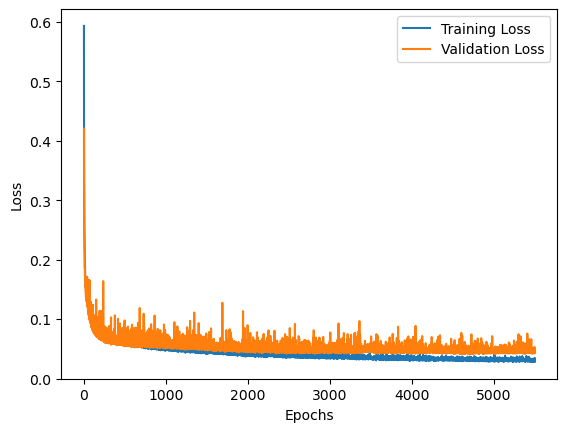

In [19]:
import matplotlib.pyplot as plt

plt.plot(plot_data.history['loss'], label='Training Loss')
plt.plot(plot_data.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [20]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
y_pred=neural_regressor.predict(x_train)
r=r2_score(y_train,y_pred)
print("Training")
print("R2 Score:",r)
print("MSE: ",mean_squared_error(y_train,y_pred))
print("MAE: ",mean_absolute_error(y_train,y_pred))

190/190 [==============================] - 1s 1ms/step
Training
R2 Score: 0.9402848859738244
MSE:  0.0268831342110031
MAE:  0.10100889847266069


In [21]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
y_pred=neural_regressor.predict(x_test)
r2=r2_score(y_test,y_pred)
print("Validation")
print("R2 Score:",r2)
print("MSE: ",mean_squared_error(y_test,y_pred))
print("MAE: ",mean_absolute_error(y_test,y_pred))

48/48 [==============================] - 0s 2ms/step
Validation
R2 Score: 0.8987474946793602
MSE:  0.04383977308656608
MAE:  0.11865997506454838


In [22]:
import pickle
with open('yield_prediction.pkl','wb') as model_file:
    pickle.dump(neural_regressor,model_file)

In [108]:
area = float(input("Enter the area: "))
production = float(input("Enter the production: "))
annual_rainfall = float(input("Enter the annual rainfall: "))
fertilizer = float(input("Enter the fertilizer amount: "))
pesticide = float(input("Enter the pesticide amount: "))
crop=input("Enter the name of the crop:")
state=input("Enter the name of the State:")
season=input("Enter the name of the Season:")

Enter the area: 6637
Enter the production: 4685
Enter the annual rainfall: 2051
Enter the fertilizer amount: 631643
Enter the pesticide amount: 2057
Enter the name of the crop:Arhar/Tur
Enter the name of the State:Assam
Enter the name of the Season:Kharif


In [109]:
c={'Arecanut':0,'Arhar/Tur':1,'Castor seed':8,'Coconut':9,'Cotton(lint)':11,'Dry chillies':13,'Gram':16,'Jute':21,'Linseed':23,'Maize':24,'Mesta':26,'Niger seed':29,'Onion':31,'Other  Rabi pulses':32,'Potato':37,'Rapeseed &Mustard':39,'Rice':40,'Sesamum':43,'Small millets':44,'Sugarcane':46,'Sweet potato':48,'Tapioca':49,'Tobacco':50,'Turmeric':51,'Wheat':53,'Bajra':2,'Black pepper':5,'Cardamom':6,'Coriander':10,'Garlic':14,'Ginger':15,'Groundnut':17,'Horse-gram':19,'Jowar':20,'Ragi':38,'Cashewnut':7,'Banana':3,'Soyabean':45,'Barley': 4,'Khesari':22,'Masoor':25,'Moong(Green Gram)':27,'Other Kharif pulses':34,'Safflower':41,'Sannhamp':42,'Sunflower':47,'Urad':52,'Peas & beans (Pulses)':36,'other oilseeds':54,'Other Cereals':33,'Cowpea(Lobia)':12,'Oilseeds total':30,'Guar seed':18,'Other Summer Pulses':35,'Moth':28  
}

In [110]:
s={'Whole Year':4,'Kharif':1,'Rabi':2,'Autumn':0,'Summer':3,'Winter':5}  

In [111]:
st={'Assam':2,'Karnataka':12,'Kerala':13,'Meghalaya':17,'West Bengal':29,'Puducherry':21,'Goa':6,'Andhra Pradesh':0,'Tamil Nadu':24,'Odisha':20,'Bihar':3,'Gujarat':7,'Madhya Pradesh':14,'Maharashtra':15,'Mizoram':18,'Punjab':22,'Uttar Pradesh':27,'Haryana':8,'Himachal Pradesh':9,'Tripura':26,'Nagaland':19,'Chhattisgarh':4,'Uttarakhand':28,'Jharkhand':11,'Delhi':5,'Manipur':16,'Jammu and Kashmir':10,'Telangana':25,'Arunachal Pradesh':1,'Sikkim':23 } 

In [112]:
if crop in c:
    crop=c[crop]
if state in st:
    state=st[state]
if season in s:
    season=s[season]
user_input=[area,production,annual_rainfall,fertilizer,pesticide,crop,state,season]
user_input_df = pd.DataFrame([user_input], columns=X.columns)
scaler=MinMaxScaler()
input_data_scaled=scaler.fit_transform(user_input_df)
input_data_scaled=input_data_scaled.transpose()
predicted_yield = neural_regressor.predict(input_data_scaled)

print(f"Predicted yield production: {predicted_yield[0]}")

1/1 [==============================] - 0s 131ms/step
Predicted yield production: [134917.11]


In [1]:
pip list

Package                       VersionNote: you may need to restart the kernel to use updated packages.

----------------------------- --------------------
absl-py                       2.0.0
aiobotocore                   2.7.0
aiohttp                       3.9.0
aioitertools                  0.7.1
aiosignal                     1.2.0
alabaster                     0.7.12
anaconda-anon-usage           0.4.3
anaconda-client               1.12.2
anaconda-navigator            2.3.1
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
astunparse                    1.6.3
async-timeout                 4.0.3
atomicwrites                  1.4.0
attrs                         23.1.0
Automat                       20.2.0
autopep8                      1.6.0
Babel      

In [29]:
!pip install seaborn --upgrade

     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     -------------------- ------------------- 30.7/61.0 kB ? eta -:--:--
     -------------------------- ------------- 41.0/61.0 kB 1.9 MB/s eta 0:00:01
     -------------------------- ------------- 41.0/61.0 kB 1.9 MB/s eta 0:00:01
     -------------------------- ------------- 41.0/61.0 kB 1.9 MB/s eta 0:00:01
     -------------------------- ------------- 41.0/61.0 kB 1.9 MB/s eta 0:00:01
     -------------------------------------- 61.0/61.0 kB 232.0 kB/s eta 0:00:00
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   --------------- ------------------------ 112.6/294.9 kB 3.2 MB/s eta 0:00:01
   --------------- ------------------------ 112.6/294.9 kB 3.2 MB/s eta 0:00:01
   -----

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires llvmlite<0.39,>=0.38.0rc1, but you have llvmlite 0.41.0 which is incompatible.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.26.4 which is incompatible.
scipy 1.9.1 requires numpy<1.25.0,>=1.18.5, but you have numpy 1.26.4 which is incompatible.


In [30]:
pip list

Package                       Version
----------------------------- --------------------
absl-py                       2.0.0
aiobotocore                   2.7.0
aiohttp                       3.9.0
aioitertools                  0.7.1
aiosignal                     1.2.0
alabaster                     0.7.12
anaconda-anon-usage           0.4.3
anaconda-client               1.12.2
anaconda-navigator            2.3.1
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
astunparse                    1.6.3
async-timeout                 4.0.3
atomicwrites                  1.4.0
attrs                         23.1.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.11.0
backcall                      0.2.0
back

In [1]:
! pip install numpy --upgrade

  Using cached numpy-1.26.4-cp39-cp39-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp39-cp39-win_amd64.whl (15.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
  Rolling back uninstall of numpy
  Moving to c:\users\megha\anaconda3\lib\site-packages\numpy-1.24.3.dist-info\
   from C:\Users\megha\anaconda3\Lib\site-packages\~umpy-1.24.3.dist-info
  Moving to c:\users\megha\anaconda3\lib\site-packages\numpy\__config__.py
   from C:\Users\megha\AppData\Local\Temp\pip-uninstall-0_nexna6\__config__.py
  Moving to c:\users\megha\anaconda3\lib\site-packages\numpy\__init__.cython-30.pxd
   from C:\Users\megha\AppData\Local\Temp\pip-uninstall-0_nexna6\__init__.cython-30.pxd
  Moving to c:\users\megha\anaconda3\lib\site-packages\numpy\__init__.pxd
   from C:\Users\megha\AppData\Local\Temp\pip-uninstall-0_nexna6\__init__.pxd
  Moving to c:\users\megha\anaconda3\lib\site-packages\

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\megha\\anaconda3\\Lib\\site-packages\\numpy.libs\\libopenblas64__v0.3.23-293-gc2f4bdbb-gcc_10_3_0-2bde3a66a51006b2b53eb373ff767a3f.dll'
Consider using the `--user` option or check the permissions.

